In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from tqdm import tqdm
from scipy.stats import lomax
from collections import Counter
from scipy.stats import gamma
from scipy.stats import beta
import warnings
warnings.filterwarnings("ignore", message = 'DataFrame is highly fragmented.  This is usually the result of')
warnings.filterwarnings('ignore', message = 'iteritems is deprecated and will be removed in a future version.')
warnings.filterwarnings('ignore', message = 'The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False')

In [302]:
%run -i MABs_Classes_Functions
%run -i MABs_Exp_Generations
%run -i MABs_KL_Functions
%run -i MABs_Env_Generations

# Final Simulations

In [15]:
def dirichlet_choices_regrets(n_rounds, n_iterations, n_arms, n_variables, conc, beta_1, beta_v, beta_moss, soft_temp, soft_eps_temp, title, d_eps, d_soft, dist = 'Dirichlet'):
    regrets_thom, choices_thom = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lb = 1, ub = n_variables, conc = conc)
    regrets_ucb1, choices_ucb1 = ucb_1_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = beta_1, conc = conc)
    regrets_ucbv, choices_ucbv = ucb_v_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = beta_v, conc = conc)
    regrets_moss, choices_moss = ucb_moss_experiment_generation(beta = beta_moss, n_rounds = n_rounds, n_iterations = n_iterations, conc = conc)
    regrets_eps, choices_eps = eps_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, conc = conc, prob = decay_prob(d_eps))
    regrets_soft, choices_soft = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, conc = conc, temp = soft_temp)
    regrets_soft_eps, choices_soft_eps = softmax_eps_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, conc = conc, temp = soft_eps_temp, prob = decay_prob(d_soft))

    all_choices = [choices_ucb1, choices_ucbv, choices_moss, choices_eps, choices_soft, choices_soft_eps, choices_thom]
    all_regrets = [regrets_ucb1, regrets_ucbv, regrets_moss, regrets_eps, regrets_soft, regrets_soft_eps, regrets_thom]
    cols = ['ucb1', 'ucbv', 'moss', 'epsilon', 'softmax', 'soft-eps', 'thompson']
    
    exp_data = pd.DataFrame()
    for i in range(len(all_choices)):
        for j in range(len(choices_ucb1)):
            exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
            
    file_name = title + '_Choices'+ '.csv'
    exp_data.to_csv(file_name)
            
    exp_data = pd.DataFrame()
    for i in range(len(all_choices)):
        for j in range(len(choices_ucb1)):
            exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
        
    file_name = title + '_Regrets'+ '.csv'
    exp_data.to_csv(file_name)

In [37]:
#Base Case

n_rounds = 50000
n_iterations = 150
n_arms = 10
n_variables = 10
conc = 0.5
beta_1 = 2
beta_v = 1
beta_moss = 2
soft_temp = 0.3
soft_eps_temp = 0.75
d_eps = -0.65
d_soft = -0.6
title = 'Dirichlet_Base'

dirichlet_choices_regrets(n_rounds = n_rounds, n_iterations = n_iterations, n_arms = n_arms, n_variables = n_variables, conc = conc, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, title = title, dist = 'Dirichlet', beta_moss = beta_moss, d_eps = d_eps, d_soft = d_soft)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [28:54<00:00, 11.56s/it]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

In [38]:
#Uniform Case

n_rounds = 50000
n_iterations = 150
n_arms = 10
n_variables = 10
conc = 10
beta_1 = 2
beta_v = 1
beta_moss = 3
soft_temp = 0.3
soft_eps_temp = 0.85
d_eps = -0.6
d_soft = -0.6
title = 'Dirichlet_Uniform'

dirichlet_choices_regrets(n_rounds = n_rounds, n_iterations = n_iterations, n_arms = n_arms, n_variables = n_variables, conc = conc, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, title = title, dist = 'Dirichlet', beta_moss = beta_moss, d_eps = d_eps, d_soft = d_soft)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [28:53<00:00, 11.56s/it]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

In [39]:
#Uniform Case

n_rounds = 50000
n_iterations = 150
n_arms = 10
n_variables = 10
conc = 0.1
beta_1 = 2
beta_v = 1
beta_moss = 2
soft_temp = 0.1
soft_eps_temp = 0.75
d_eps = -0.8
d_soft = -0.6
title = 'Dirichlet_Degenerate'

dirichlet_choices_regrets(n_rounds = n_rounds, n_iterations = n_iterations, n_arms = n_arms, n_variables = n_variables, conc = conc, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, title = title, dist = 'Dirichlet', beta_moss = beta_moss, d_eps = d_eps, d_soft = d_soft)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [29:17<00:00, 11.72s/it]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-15-e2454885641d>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

In [40]:
def bernoulli_choices_regrets(n_rounds, n_iterations, n_arms, n_variables, beta_1, beta_v, soft_temp, soft_eps_temp, l_rate, max_iter, title, beta_moss, d_eps, d_soft, dist = 'Bernoulli'):
    regrets_kl, choices_kl = ucb_kl_experiment_generation(n_rounds, n_iterations, dist = dist, l_rate = l_rate, max_iter = max_iter)
    regrets_bayes, choices_bayes = bayes_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist)
    regrets_thom, choices_thom = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lb = 0, ub = 1)
    regrets_eps, choices_eps = eps_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, prob = decay_prob(d_eps))
    regrets_soft, choices_soft = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, temp = soft_temp, dist = dist)
    regrets_soft_eps, choices_soft_eps = softmax_eps_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, temp = soft_eps_temp, dist = dist, prob = decay_prob(d_soft))
    regrets_ucb1, choices_ucb1 = ucb_1_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = beta_1, dist = dist)
    regrets_ucbv, choices_ucbv = ucb_v_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, beta = beta_v, dist = dist)
    regrets_moss, choices_moss = ucb_moss_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, beta = beta_moss)
    
    all_choices = [choices_ucb1, choices_ucbv, choices_moss, choices_eps, choices_soft, choices_soft_eps, choices_thom, choices_bayes, choices_kl]
    all_regrets = [regrets_ucb1, regrets_ucbv, regrets_moss, regrets_eps, regrets_soft, regrets_soft_eps, regrets_thom, regrets_bayes, regrets_kl]
    
    cols = ['ucb1', 'ucbv', 'moss', 'epsilon', 'softmax', 'soft-eps', 'thompson', 'ucbbayes', 'ucbkl']
    
    exp_data = pd.DataFrame()
    for i in range(len(all_choices)):
        for j in range(len(choices_ucb1)):
            exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
            
    file_name = title + '_Choices'+ '.csv'
    exp_data.to_csv(file_name)
            
    exp_data = pd.DataFrame()
    for i in range(len(all_choices)):
        for j in range(len(choices_ucb1)):
            exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
        
    file_name = title + '_Regrets'+ '.csv'
    exp_data.to_csv(file_name)

In [41]:
n_rounds = 50000
n_iterations = 100
n_arms = 10
n_variables = 2
beta_1 = 2
beta_v = 0
beta_moss = 1
d_eps = -0.7
soft_temp = 0.05
d_soft = -0.7
soft_eps_temp = 0.3
title = 'Bernoulli'
dist = 'Bernoulli'

bernoulli_choices_regrets(n_rounds = n_rounds, n_iterations = n_iterations, n_arms = n_arms, n_variables = n_variables, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, title = title, dist = dist, beta_moss = beta_moss, d_eps = d_eps, d_soft = d_soft, l_rate = 0.01, max_iter = 10000)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [22:17<00:00, 13.38s/it]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-40-538f6874e9a3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-40-538f6874e9a3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

In [42]:
n_rounds = 50000
n_iterations = 100
beta_1 = 2
beta_v = 1
beta_moss = 4
d_eps = -0.7
soft_temp = 0.3
d_soft = -0.5
soft_eps_temp = 0.75
shape = 15
scale = 1
dist = 'Poisson'
lambdas = np.arange(10,21,1)
title = 'Poisson_2'
pois_exp_choices_regrets(n_rounds = n_rounds, n_iterations = n_iterations, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, l_rate = 0.01, max_iter = 10000, lambdas = lambdas, title = title, dist = dist, shape = shape, scale = scale, d_eps = d_eps, d_soft = d_soft, beta_moss = beta_moss)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [06:25<00:00,  3.85s/it]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_choices[i][j, :]
<ipython-input-31-a90f55dd2860>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exp_data[cols[i] + '_' + str(j)] = all_regrets[i][j, :]
<ipython-input-31-a90f55dd2860>:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

# Parallel Simulations

## Poisson and Exponential Comparisons

In [54]:
n_rounds = 100000
n_iterations = 50
beta_1 = 2
beta_v = 1
soft_temp = 0.3
soft_eps_temp = 0.5
l_rate = 0.01
max_iter = 10000
dist = 'Poisson'
lambdas = np.arange(1,11,1)
title = 'Poisson_1'
pois_exp_comparison(n_rounds = n_rounds, n_iterations = n_iterations, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, l_rate = l_rate, max_iter = max_iter, lambdas = lambdas, title = title, dist = dist)

100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [1:58:25<00:00, 142.10s/it]


In [55]:
n_rounds = 100000
n_iterations = 50
beta_1 = 3
beta_v = 1
soft_temp = 0.3
soft_eps_temp = 0.8
l_rate = 0.01
max_iter = 10000
dist = 'Poisson'
lambdas = np.arange(10,21,1)
title = 'Poisson_2'
pois_exp_comparison(n_rounds = n_rounds, n_iterations = n_iterations, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, l_rate = l_rate, max_iter = max_iter, lambdas = lambdas, title = title, dist = dist)

100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [2:04:00<00:00, 148.80s/it]


In [62]:
n_rounds = 100000
n_iterations = 50
beta_1 = 6
beta_v = 1
soft_temp = 0.8
soft_eps_temp = 1
l_rate = 0.01
max_iter = 10000
dist = 'Exponential'
lambdas = np.arange(1,11,1)
title = 'Exponential_1'
pois_exp_comparison(n_rounds = n_rounds, n_iterations = n_iterations, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, l_rate = l_rate, max_iter = max_iter, lambdas = lambdas, title = title, dist = dist)

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [1:11:54<00:00, 86.29s/it]


In [63]:
n_rounds = 100000
n_iterations = 50
beta_1 = 7
beta_v = 2
soft_temp = 0.3
soft_eps_temp = 1
l_rate = 0.01
max_iter = 10000
dist = 'Exponential'
lambdas = np.arange(10,21,1)
title = 'Exponential_2'
pois_exp_comparison(n_rounds = n_rounds, n_iterations = n_iterations, beta_1 = beta_1, beta_v = beta_v, soft_temp = soft_temp, soft_eps_temp = soft_eps_temp, l_rate = l_rate, max_iter = max_iter, lambdas = lambdas, title = title, dist = dist)

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [1:12:11<00:00, 86.63s/it]


## SoftMax Simulations

In [166]:
def decay_temp(init_temp):
    return lambda x: init_temp/x

In [241]:
n_iterations = 150
n_rounds = 50000
dist = 'Dirichlet'
conc = 0.5
temp = 150


all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, conc = conc, temp = decay_temp(temp))

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'softmax_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Softmax_Dirichlet_Base_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'softmax_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Softmax_Dirichlet_Base_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [49:45<00:00, 19.90s/it]


In [242]:
n_iterations = 150
n_rounds = 50000
dist = 'Dirichlet'
conc = 10
temp = 250


all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, conc = conc, temp = decay_temp(temp))

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'softmax_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Softmax_Dirichlet_Uniform_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'softmax_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Softmax_Dirichlet_Uniform_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [42:17<00:00, 16.92s/it]


In [243]:
n_iterations = 150
n_rounds = 50000
dist = 'Dirichlet'
conc = 0.1
temp = 100


all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, conc = conc, temp = decay_temp(temp))

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'softmax_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Softmax_Dirichlet_Degenerate_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'softmax_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Softmax_Dirichlet_Degenerate_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [42:03<00:00, 16.82s/it]


In [304]:
n_iterations = 100
n_rounds = 50000
dist = 'Bernoulli'
temp = 20


all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp))

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'softmax_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Softmax_Bernoulli_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'softmax_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Softmax_Bernoulli_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [34:50<00:00, 20.90s/it]


In [194]:
n_iterations = 100
n_rounds = 50000
dist = 'Poisson'
temp = 100
lambdas = np.arange(1,11,1)


all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'softmax_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Softmax_Poisson_1_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'softmax_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Softmax_Poisson_1_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [17:39<00:00, 10.60s/it]


In [195]:
n_iterations = 100
n_rounds = 50000
dist = 'Poisson'
temp = 250
lambdas = np.arange(10,21,1)


all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'softmax_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Softmax_Poisson_2_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'softmax_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Softmax_Poisson_2_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [16:42<00:00, 10.02s/it]


In [196]:
n_iterations = 100
n_rounds = 50000
dist = 'Exponential'
temp = 450
lambdas = np.arange(1,11,1)


all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'softmax_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Softmax_Exponential_1_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'softmax_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Softmax_Exponential_1_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:58<00:00,  9.59s/it]


In [197]:
n_iterations = 100
n_rounds = 50000
dist = 'Exponential'
temp = 750
lambdas = np.arange(10,21,1)


all_regrets, all_choices = softmax_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), lambdas = lambdas)

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'softmax_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Softmax_Exponential_2_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'softmax_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Softmax_Exponential_2_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:50<00:00,  9.51s/it]


## Soft-Eps Simulations

In [280]:
n_iterations = 150
n_rounds = 50000
dist = 'Dirichlet'
conc = 0.5
decay = -0.4
temp = 250

all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = conc, temp = decay_temp(temp), prob = decay_prob(decay))

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'soft-eps_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Soft-eps_Dirichlet_Base_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'soft-eps_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Soft-eps_Dirichlet_Base_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [33:10<00:00, 13.27s/it]


In [281]:
n_iterations = 150
n_rounds = 50000
dist = 'Dirichlet'
conc = 10
decay = -0.3
temp = 200

all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = conc, temp = decay_temp(temp), prob = decay_prob(decay))

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'soft-eps_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Soft-eps_Dirichlet_Uniform_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'soft-eps_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Soft-eps_Dirichlet_Uniform_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [37:58<00:00, 15.19s/it]


In [ ]:
n_iterations = 150
n_rounds = 50000
dist = 'Dirichlet'
conc = 0.1
decay = -0.4
temp = 20

all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, conc = conc, temp = decay_temp(temp), prob = decay_prob(decay))

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'soft-eps_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Soft-eps_Dirichlet_Degenerate_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'soft-eps_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Soft-eps_Dirichlet_Degenerate_Regrets.csv')

In [305]:
n_iterations = 100
n_rounds = 50000
dist = 'Bernoulli'
decay = -0.4
temp = 20

all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay))

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'soft-eps_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Soft-eps_Bernoulli_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'soft-eps_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Soft-eps_Bernoulli_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [20:55<00:00, 12.55s/it]


In [284]:
n_iterations = 100
n_rounds = 50000
dist = 'Poisson'
lambdas = np.arange(1,11,1)
decay = -0.4
temp = 100

all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'soft-eps_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Soft-eps_Poisson_1_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'soft-eps_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Soft-eps_Poisson_1_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:50<00:00,  5.31s/it]


In [285]:
n_iterations = 100
n_rounds = 50000
dist = 'Poisson'
lambdas = np.arange(10,21,1)
decay = -0.4
temp = 250

all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'soft-eps_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Soft-eps_Poisson_2_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'soft-eps_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Soft-eps_Poisson_2_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:54<00:00,  5.34s/it]


In [286]:
n_iterations = 100
n_rounds = 50000
dist = 'Exponential'
lambdas = np.arange(1,11,1)
decay = -0.3
temp = 500

all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)

data = pd.DataFrame()
exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'soft-eps_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Soft-eps_Exponential_1_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'soft-eps_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Soft-eps_Exponential_1_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [11:12<00:00,  6.72s/it]


In [287]:
n_iterations = 100
n_rounds = 50000
dist = 'Exponential'
lambdas = np.arange(10,21,1)
decay = -0.4
temp = 1200

all_regrets, all_choices = softmax_eps_experiment_generation_new(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, temp = decay_temp(temp), prob = decay_prob(decay), lambdas = lambdas)

exp_data = pd.DataFrame()
for i in range(len(all_choices)):
    col_name = 'soft-eps_choices_' + str(i) 
    exp_data[col_name] = all_choices[i, :]
            
exp_data.to_csv('Soft-eps_Exponential_2_Choices.csv')

exp_data = pd.DataFrame()
for i in range(len(all_regrets)):
    col_name = 'soft-eps_regrets_' + str(i)
    exp_data[col_name] = all_regrets[i, :]

exp_data.to_csv('Soft-eps_Exponential_2_Regrets.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [08:28<00:00,  5.09s/it]


## Thompson Simulations

In [18]:
n_iterations = 50
n_rounds = 100000
dist = 'Dirichlet'
conc = 0.5

all_regrets, all_choices = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc)

data = pd.DataFrame()
data['thompson_regrets'] = all_regrets.mean(axis = 0)
data['thompson_choice'] = all_choices
data['thompson_stds'] = all_regrets.std(axis = 0)
data.to_csv('Thompson_Dirichlet_Base.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [18:38<00:00, 22.37s/it]


In [19]:
n_iterations = 50
n_rounds = 100000
dist = 'Dirichlet'
conc = 10

all_regrets, all_choices = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc)

data = pd.DataFrame()
data['thompson_regrets'] = all_regrets.mean(axis = 0)
data['thompson_choice'] = all_choices
data['thompson_stds'] = all_regrets.std(axis = 0)
data.to_csv('Thompson_Dirichlet_Uniform.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [18:00<00:00, 21.61s/it]


In [20]:
n_iterations = 50
n_rounds = 100000
dist = 'Dirichlet'
conc = 0.1

all_regrets, all_choices = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, conc = conc)

data = pd.DataFrame()
data['thompson_regrets'] = all_regrets.mean(axis = 0)
data['thompson_choice'] = all_choices
data['thompson_stds'] = all_regrets.std(axis = 0)
data.to_csv('Thompson_Dirichlet_Degenerate.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [18:25<00:00, 22.11s/it]


In [21]:
n_iterations = 50
n_rounds = 100000
dist = 'Bernoulli'
all_regrets, all_choices = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist)

data = pd.DataFrame()
data['thompson_regrets'] = all_regrets.mean(axis = 0)
data['thompson_choice'] = all_choices
data['thompson_stds'] = all_regrets.std(axis = 0)
data.to_csv('Thompson_Bernoulli.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [20:00<00:00, 24.01s/it]


In [22]:
n_iterations = 50
n_rounds = 100000
dist = 'Poisson'
lambdas = np.arange(1,11,1)

all_regrets, all_choices = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)


data = pd.DataFrame()
data['thompson_regrets'] = all_regrets.mean(axis = 0)
data['thompson_choice'] = all_choices
data['thompson_stds'] = all_regrets.std(axis = 0)
data.to_csv('Thompson_Poisson_1.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [10:03<00:00, 12.07s/it]


In [23]:
n_iterations = 50
n_rounds = 100000
dist = 'Poisson'
lambdas = np.arange(10,21,1)

all_regrets, all_choices = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)

data = pd.DataFrame()
data['thompson_regrets'] = all_regrets.mean(axis = 0)
data['thompson_choice'] = all_choices
data['thompson_stds'] = all_regrets.std(axis = 0)
data.to_csv('Thompson_Poisson_2.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [11:07<00:00, 13.35s/it]


In [24]:
n_iterations = 50
n_rounds = 100000
dist = 'Exponential'
lambdas = np.arange(1,11,1)

all_regrets, all_choices = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)

data = pd.DataFrame()
data['thompson_regrets'] = all_regrets.mean(axis = 0)
data['thompson_choice'] = all_choices
data['thompson_stds'] = all_regrets.std(axis = 0)
data.to_csv('Thompson_Exponential_1.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [09:09<00:00, 10.99s/it]


In [25]:
n_iterations = 50
n_rounds = 100000
dist = 'Exponential'
lambdas = np.arange(10,21,1)

all_regrets, all_choices = thompson_experiment_generation(n_rounds = n_rounds, n_iterations = n_iterations, dist = dist, lambdas = lambdas)

data = pd.DataFrame()
data['thompson_regrets'] = all_regrets.mean(axis = 0)
data['thompson_choice'] = all_choices
data['thompson_stds'] = all_regrets.std(axis = 0)
data.to_csv('Thompson_Exponential_2.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [09:24<00:00, 11.29s/it]


# Dataset Fine-Tuning

## Thompson

In [44]:
all_files = os.listdir('Simulations')
comp_files = ['Dirichlet_Base.csv', 'Dirichlet_Uniform.csv', 'Dirichlet_Degenerate.csv', 'Bernoulli.csv', 'Poisson_1.csv',
              'Poisson_2.csv', 'Exponential_1.csv', 'Exponential_2.csv']
thom_files = [all_files[i] for i in range(len(all_files)) if 'Thompson' == all_files[i].split('_')[0]]
thom_comp = dict()
for file in thom_files:
    for file_2 in comp_files:
        if '_'.join(file.split('_')[1:]) == file_2:
            thom_comp[file] = file_2

In [47]:
for thom, comp in thom_comp.items():
    data_dir = 'Simulations/' + comp
    thom_dir = 'Simulations/' + thom
    data = pd.read_csv(data_dir).drop('Unnamed: 0', axis = 1)
    thom = pd.read_csv(thom_dir).drop('Unnamed: 0', axis = 1)
    thom = thom.rename({'thompson_choice':'thompson_choices'}, axis = 1)
    thom_cols = [data.columns[i] for i in range(len(data.columns)) if data.columns[i].split('_')[0] == 'thompson']
    data[thom_cols] = thom
    data.to_csv(data_dir)

## SoftMax

In [254]:
all_files = os.listdir('First Simulations')
file_types = ['Dirichlet_Base.csv', 'Dirichlet_Uniform.csv', 'Dirichlet_Degenerate.csv', 'Bernoulli.csv', 'Poisson_1.csv',
              'Poisson_2.csv', 'Exponential_1.csv', 'Exponential_2.csv']
comp_files = []
for typ in file_types:
    comp_files.append(typ.split('.')[0] + '_Regrets.csv')
    comp_files.append(typ.split('.')[0] + '_Choices.csv')
    
soft_files = [all_files[i] for i in range(len(all_files)) if 'Softmax' == all_files[i].split('_')[0]]
soft_comp = dict()
for file in soft_files:
    for file_2 in comp_files:
        if '_'.join(file.split('_')[1:]) == file_2:
            soft_comp[file] = file_2

In [255]:
for soft, comp in soft_comp.items():
    soft_dir = 'First Simulations/' + soft
    comp_dir = 'First Simulations/' + comp
    soft_file = pd.read_csv(soft_dir).drop('Unnamed: 0', axis = 1)
    comp_file = pd.read_csv(comp_dir).drop('Unnamed: 0', axis = 1)
    soft_cols = []
    for col in comp_file.columns:
        if col.split('_')[0] == 'softmax':
            soft_cols.append(col)
    new_old_col = dict()
    if soft_file.columns[0].split('_')[1] == 'choices':
        for i in range(len(soft_file.columns)):
            new_old_col[f'softmax_choices_{i}'] = f'softmax_{i}'
    else:
        for i in range(len(soft_file.columns)):
            new_old_col[f'softmax_regrets_{i}'] = f'softmax_{i}'
    soft_file.rename(new_old_col, axis = 1, inplace = True)
    comp_file[soft_cols] = soft_file 
    comp_file.to_csv(comp_dir)

### Bernoulli

In [307]:
comp_dir = 'First Simulations/Bernoulli_Regrets.csv'
soft_file = pd.read_csv('First Simulations/Softmax_Bernoulli_Regrets.csv').drop('Unnamed: 0', axis = 1)
comp_file = pd.read_csv(comp_dir).drop('Unnamed: 0', axis = 1)
soft_cols = []
for col in comp_file.columns:
    if col.split('_')[0] == 'softmax':
        soft_cols.append(col)
new_old_col = dict()
for i in range(len(soft_file.columns)):
    new_old_col[f'softmax_regrets_{i}'] = f'softmax_{i}'
soft_file.rename(new_old_col, axis = 1, inplace = True)
comp_file[soft_cols] = soft_file 
comp_file.to_csv(comp_dir)

In [308]:
comp_dir = 'First Simulations/Bernoulli_Choices.csv'
soft_file = pd.read_csv('First Simulations/Softmax_Bernoulli_Choices.csv').drop('Unnamed: 0', axis = 1)
comp_file = pd.read_csv(comp_dir).drop('Unnamed: 0', axis = 1)
soft_cols = []
for col in comp_file.columns:
    if col.split('_')[0] == 'softmax':
        soft_cols.append(col)
new_old_col = dict()
for i in range(len(soft_file.columns)):
    new_old_col[f'softmax_choices_{i}'] = f'softmax_{i}'
soft_file.rename(new_old_col, axis = 1, inplace = True)
comp_file[soft_cols] = soft_file 
comp_file.to_csv(comp_dir)

## Soft-Eps

In [291]:
all_files = os.listdir('First Simulations')
file_types = ['Dirichlet_Base.csv', 'Dirichlet_Uniform.csv', 'Dirichlet_Degenerate.csv', 'Bernoulli.csv', 'Poisson_1.csv',
              'Poisson_2.csv', 'Exponential_1.csv', 'Exponential_2.csv']
comp_files = []
for typ in file_types:
    comp_files.append(typ.split('.')[0] + '_Regrets.csv')
    comp_files.append(typ.split('.')[0] + '_Choices.csv')
    
soft_files = [all_files[i] for i in range(len(all_files)) if 'Soft-eps' == all_files[i].split('_')[0]]
soft_comp = dict()
for file in soft_files:
    for file_2 in comp_files:
        if '_'.join(file.split('_')[1:]) == file_2:
            soft_comp[file] = file_2

In [292]:
for soft, comp in soft_comp.items():
    soft_dir = 'First Simulations/' + soft
    comp_dir = 'First Simulations/' + comp
    soft_file = pd.read_csv(soft_dir).drop('Unnamed: 0', axis = 1)
    comp_file = pd.read_csv(comp_dir).drop('Unnamed: 0', axis = 1)
    soft_cols = []
    for col in comp_file.columns:
        if col.split('_')[0] == 'soft-eps':
            soft_cols.append(col)
    new_old_col = dict()
    if soft_file.columns[0].split('_')[1] == 'choices':
        for i in range(len(soft_file.columns)):
            new_old_col[f'soft-eps_choices_{i}'] = f'soft-eps_{i}'
    else:
        for i in range(len(soft_file.columns)):
            new_old_col[f'soft-eps_regrets_{i}'] = f'soft-eps_{i}'
    soft_file.rename(new_old_col, axis = 1, inplace = True)
    comp_file[soft_cols] = soft_file 
    comp_file.to_csv(comp_dir)

### Bernoulli

In [309]:
comp_dir = 'First Simulations/Bernoulli_Regrets.csv'
soft_file = pd.read_csv('First Simulations/Soft-eps_Bernoulli_Regrets.csv').drop('Unnamed: 0', axis = 1)
comp_file = pd.read_csv(comp_dir).drop('Unnamed: 0', axis = 1)
soft_cols = []
for col in comp_file.columns:
    if col.split('_')[0] == 'soft-eps':
        soft_cols.append(col)
new_old_col = dict()
for i in range(len(soft_file.columns)):
    new_old_col[f'soft-eps_regrets_{i}'] = f'soft-eps_{i}'
soft_file.rename(new_old_col, axis = 1, inplace = True)
comp_file[soft_cols] = soft_file 
comp_file.to_csv(comp_dir)

In [310]:
comp_dir = 'First Simulations/Bernoulli_Choices.csv'
soft_file = pd.read_csv('First Simulations/Soft-eps_Bernoulli_Choices.csv').drop('Unnamed: 0', axis = 1)
comp_file = pd.read_csv(comp_dir).drop('Unnamed: 0', axis = 1)
soft_cols = []
for col in comp_file.columns:
    if col.split('_')[0] == 'soft-eps':
        soft_cols.append(col)
new_old_col = dict()
for i in range(len(soft_file.columns)):
    new_old_col[f'soft-eps_choices_{i}'] = f'soft-eps_{i}'
soft_file.rename(new_old_col, axis = 1, inplace = True)
comp_file[soft_cols] = soft_file 
comp_file.to_csv(comp_dir)

# Plotting Functions

In [83]:
all_simulations = os.listdir('First Simulations')
all_simulations

['Bernoulli_Choices.csv',
 'Bernoulli_Regrets.csv',
 'Dirichlet_Base_Choices.csv',
 'Dirichlet_Base_Regrets.csv',
 'Dirichlet_Degenerate_Choices.csv',
 'Dirichlet_Degenerate_Regrets.csv',
 'Dirichlet_Uniform_Choices.csv',
 'Dirichlet_Uniform_Regrets.csv',
 'Exponential_1_Choices.csv',
 'Exponential_1_Regrets.csv',
 'Exponential_2_Choices.csv',
 'Exponential_2_Regrets.csv',
 'Poisson_1_Choices.csv',
 'Poisson_1_Regrets.csv',
 'Poisson_2_Choices.csv',
 'Poisson_2_Regrets.csv']

In [110]:
def cum_regrets_plot(data_directory):
    data = pd.read_csv(data_directory).drop('Unnamed: 0', axis = 1)
    file_name = '_'.join(data_directory.split('/')[1].split('_')[:-1])
    cols = data.columns
    all_algs = []
    for col in cols:
        if col.split('_')[0] not in all_algs:
            all_algs.append(col.split('_')[0])

    plt.figure(figsize = (12,8))
    for alg in all_algs:
        mean_regrets = pd.DataFrame()
        alg_cols = []
        for col in cols:
            if col.split('_')[0] == alg:
                alg_cols.append(col)
        mean_name = alg + '_regrets'
        mean_regrets = data.loc[:, alg_cols]
        plt.plot(mean_regrets.mean(axis = 1), label = mean_name)
    plt.legend()
    plt.grid()
    plt.xlabel('Rounds')
    title = file_name + ' ' + 'Cumulative Regrets'
    plt.title(title)
    plt.show()

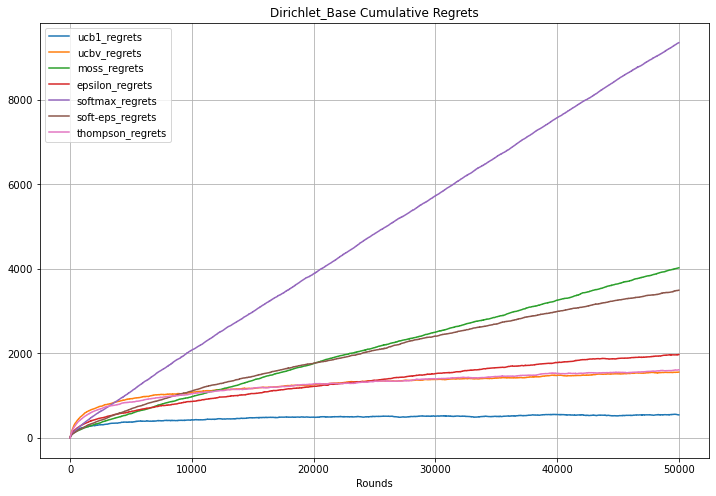

In [145]:
cum_regrets_plot('First Simulations/Dirichlet_Base_Regrets.csv')

In [111]:
def mean_choices_plot(data_directory):    
    data = pd.read_csv(data_directory).drop('Unnamed: 0', axis = 1)
    file_name = '_'.join(data_directory.split('/')[1].split('_')[:-1])
    cols = data.columns
    all_algs = []
    for col in cols:
        if col.split('_')[0] not in all_algs:
            all_algs.append(col.split('_')[0])

    plt.figure(figsize = (12,8))
    for alg in all_algs:
        alg_cols = []
        mean_choices = pd.DataFrame()
        for col in cols:
            if col.split('_')[0] == alg:
                alg_cols.append(col)
        mean_name = alg + '_choices'
        mean_choices = data.loc[:, alg_cols].mean(axis = 1)
        mean_choices_1 = [np.mean(mean_choices[i:i+100]) for i in range(len(mean_choices) - 100)]
        plt.plot(mean_choices_1, label = mean_name)
    plt.legend()
    plt.grid()
    plt.xlabel('Rounds')
    title = file_name + ' Choices'
    plt.title(title)
    plt.show()

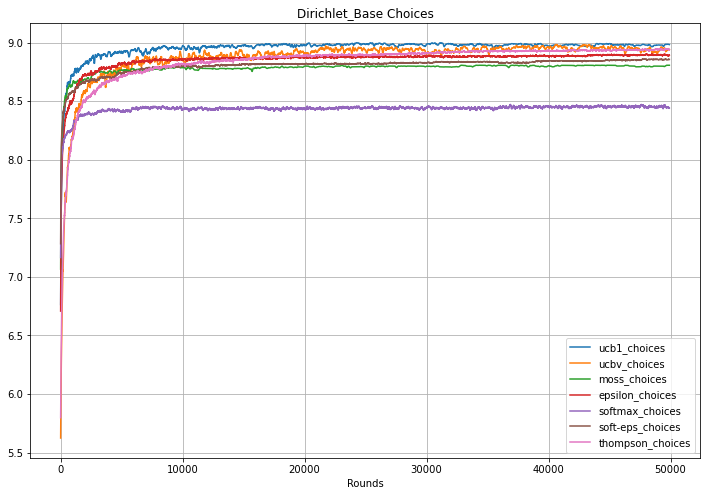

In [86]:
mean_choices_plot('First Simulations/Dirichlet_Base_Choices.csv')

In [112]:
def stds_plot(data_directory):
    data = pd.read_csv(data_directory).drop('Unnamed: 0', axis = 1)
    file_name = '_'.join(data_directory.split('/')[1].split('_')[:-1])
    cols = data.columns
    all_algs = []
    for col in cols:
        if col.split('_')[0] not in all_algs:
            all_algs.append(col.split('_')[0])

    plt.figure(figsize = (12,8))
    for alg in all_algs:
        alg_cols = []
        mean_name = alg + '_std'
        for col in cols:
            if col.split('_')[0] == alg:
                alg_cols.append(col)
        mean_regrets = data.loc[:, alg_cols]
        plt.plot(mean_regrets.std(axis = 1), label = mean_name)
    plt.legend()
    plt.grid()
    plt.xlabel('Rounds')
    title = file_name + ' ' + 'Standard Deviation Growth'
    plt.title(title)
    plt.show()

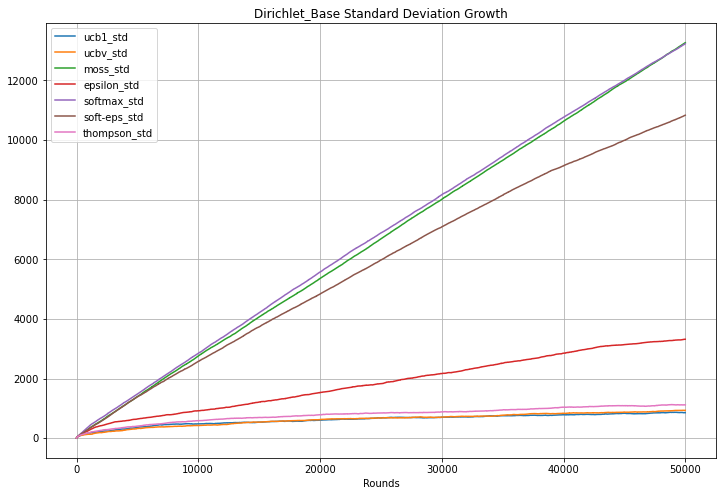

In [134]:
stds_plot('First Simulations/Dirichlet_Base_Regrets.csv')

In [113]:
def stds_bar_plot(data_directory):
    data = pd.read_csv(data_directory).drop('Unnamed: 0', axis = 1)
    file_name = '_'.join(data_directory.split('/')[1].split('_')[:-1])
    cols = data.columns
    all_algs = []
    for col in cols:
        if col.split('_')[0] not in all_algs:
            all_algs.append(col.split('_')[0])

    plt.figure(figsize = (12,8))
    all_stds = []
    for alg in all_algs:
        alg_cols = []
        for col in cols:
            if col.split('_')[0] == alg:
                alg_cols.append(col)
        mean_name = alg + '_std'
        mean_regrets = data.loc[:, alg_cols]
        all_stds.append(mean_regrets.loc[mean_regrets.shape[0]-1, :].std())
    sns.barplot(x = all_algs, y = all_stds)
    plt.grid()
    plt.xticks(rotation = 90)
    plt.xlabel('Algorithms')
    title = file_name + ' ' + 'Standard Deviations'
    for i in range(len(all_algs)):
        plt.text(i,all_stds[i],round(all_stds[i], 2), ha = 'center')
    plt.title(title)
    plt.show()

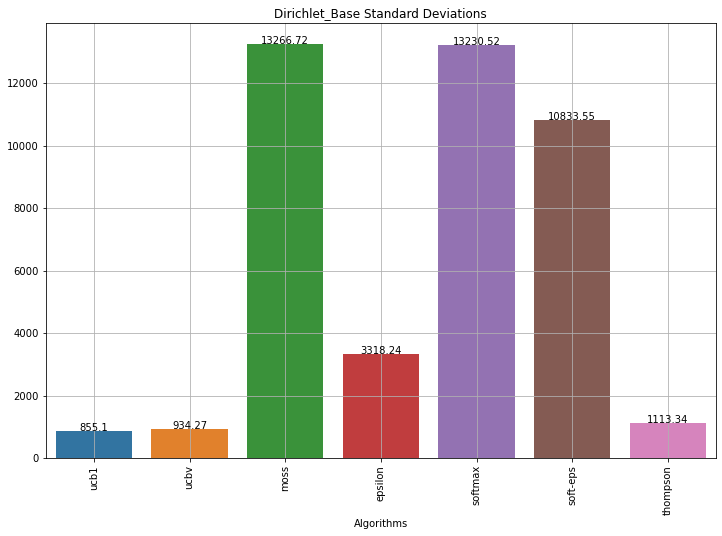

In [76]:
stds_bar_plot('First Simulations/Dirichlet_Base_Regrets.csv')

In [114]:
def last_regrets_plot(data_directory):
    data = pd.read_csv(data_directory).drop('Unnamed: 0', axis = 1)
    file_name = '_'.join(data_directory.split('/')[1].split('_')[:-1])
    cols = data.columns
    all_algs = []
    for col in cols:
        if col.split('_')[0] not in all_algs:
            all_algs.append(col.split('_')[0])

    plt.figure(figsize = (12,8))
    last_regrets = pd.DataFrame()
    for alg in all_algs:
        alg_cols = []
        for col in cols:
            if col.split('_')[0] == alg:
                alg_cols.append(col)
        mean_regrets = data.loc[:, alg_cols]
        last_regrets[alg] = list(data.loc[data.shape[0]-1, alg_cols])
    sns.violinplot(data = last_regrets)
    title = file_name + ' ' + 'Last Regrets Distribution'
    plt.xlabel('Algorithms')
    plt.grid()
    plt.title(title)
    plt.show()

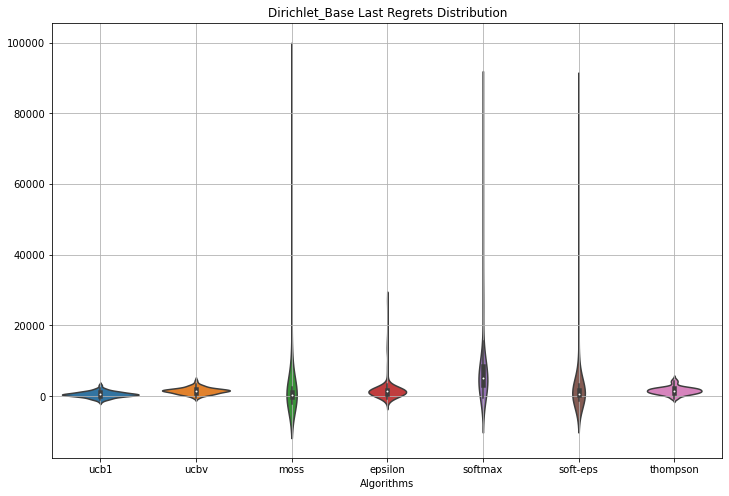

In [8]:
last_regrets_plot('First Simulations/Dirichlet_Base_Regrets.csv')

In [162]:
def opt_plot(data_directory):
    data = pd.read_csv(data_directory).drop('Unnamed: 0', axis = 1)
    file_name = '_'.join(data_directory.split('/')[1].split('_')[:-1])
    cols = data.columns
    all_algs = []
    for col in cols:
        if col.split('_')[0] not in all_algs:
            all_algs.append(col.split('_')[0])

    data_last = data.iloc[-1000:, :]
    data_last = data_last.T.reset_index().rename({'index':'name'}, axis = 1)

    algorithm = data_last.apply(lambda x: x['name'].split('_')[0], axis = 1)
    data_last['algorithm'] = algorithm
    data_last['Optimal_9'] = 0
    for i in range(data_last.shape[0]):
        if 'Poisson_2' in data_directory or 'Exponential_2' in data_directory:
            data_last.loc[i, 'Optimal_9'] = np.array(data_last.loc[i, 49000:49999] == 10.0).sum()/1000
        else:
            data_last.loc[i, 'Optimal_9'] = np.array(data_last.loc[i, 49000:49999] == 9.0).sum()/1000

    optimal = data_last.apply(lambda x: 1 if x['Optimal_9'] == 1.0 else 0, axis = 1)
    data_last['optimal'] = optimal
    data_prob = data_last.groupby('algorithm').mean().reset_index().loc[:, ['algorithm', 'Optimal_9', 'optimal']]
    data_9 = data_prob.loc[:, ['algorithm', 'Optimal_9']].reset_index(drop = True)
    data_9['type'] = '% of 9'
    data_opt = data_prob.loc[:, ['algorithm', 'optimal']].reset_index(drop = True)
    data_opt['type'] = '% of opt'
    data_final = pd.concat([data_9, data_opt])
    data_final['Frequency'] = data_final.apply(lambda x: x['Optimal_9'] if x['Optimal_9'] > 0  else x['optimal'], axis = 1)

    plt.figure(figsize = (12,8))
    sns.barplot(data = data_final, x = 'algorithm', y = 'Frequency', hue = 'type')
    title = file_name + '_Optimal Probabilities'
    plt.title(title)
    plt.xlabel('Algorithms')
    plt.grid()
    plt.show()

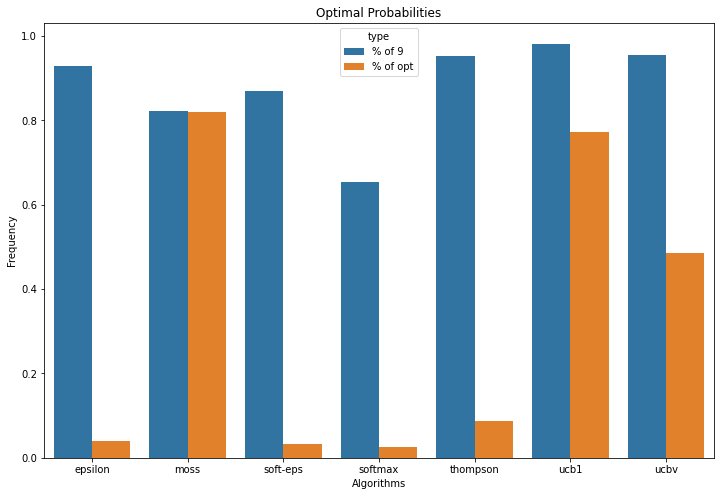

In [90]:
opt_plot('First Simulations/Dirichlet_Base_Choices.csv')

In [120]:
def all_plots(category):
    all_files = os.listdir('First Simulations')
    for file in all_files:
        data_directory = 'First Simulations/' + file
        if '_'.join(file.split('.')[0].split('_')[:-1]) == category:
            if file.split('_')[-1].split('.')[0] == 'Regrets':
                cum_regrets_plot(data_directory)
                stds_plot(data_directory)
                stds_bar_plot(data_directory)
                last_regrets_plot(data_directory)
            elif file.split('_')[-1].split('.')[0] == 'Choices':
                mean_choices_plot(data_directory)
                opt_plot(data_directory)

# Ads Experiment

In [46]:
ads_results = pd.read_csv('Ads_Experiment_Results.csv').drop('Unnamed: 0', axis = 1)
ads_results.head()

ucb1_regrets  ucb1_choices  ucbv_regrets  ucbv_choices  ucbkl_regrets  \
0             0             0             0             0              0   
1             0             1             0             1              0   
2             0             2             0             2              0   
3             0             3             0             3              0   
4             0             4             0             4              0   

   ucbkl_choices  ucbbayes_regrets  ucbbayes_choices  ucbmoss_regrets  \
0              0                 0                 0                0   
1              1                 0                 1                0   
2              2                 0                 2                0   
3              3                 0                 3                0   
4              4                 0                 4                0   

   ucbmoss_choices  thompson_regrets  thompson_choices  epsilon_regrets  \
0                0                 0                 0                0   
1                1                 0                 1                0   
2                2                 0                 2                0   
3                3                 0                 3                0   
4                4                 0                 4                0   

   epsilon_choices  softmax_regrets  softmax_choices  softeps_regrets  \
0                0                0                0                0   
1                1                0                1                0   
2                2                0                2                0   
3                3                0                3                0   
4                4                0                4                0   

   softeps_choices  
0                0  
1                1  
2                2  
3                3  
4                4

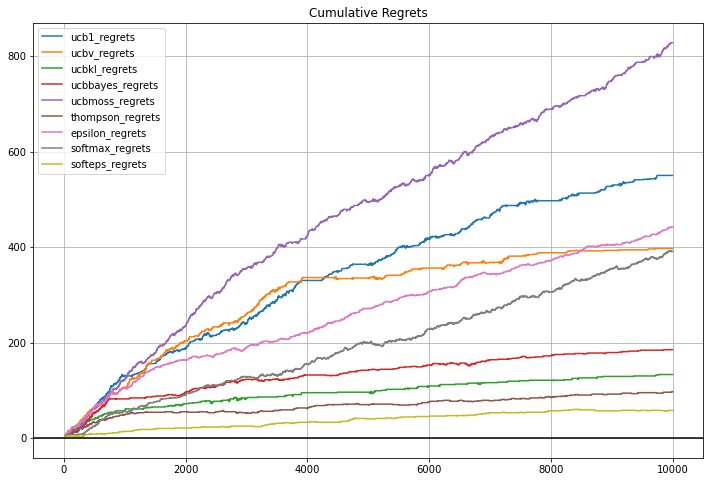

In [47]:
cum_regrets_plot(ads_results)

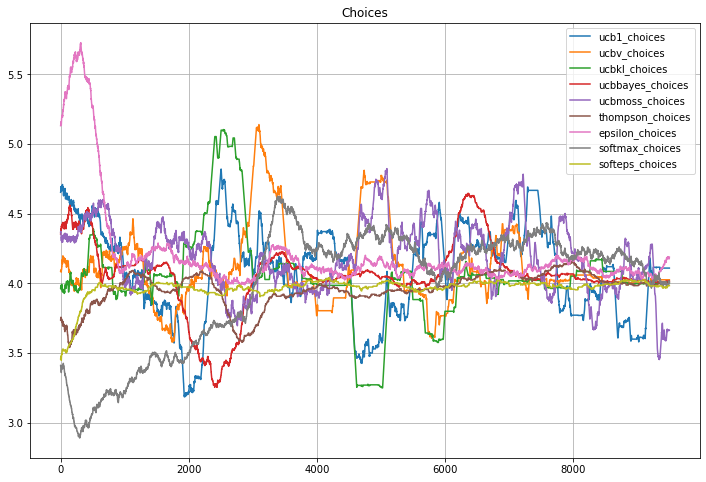

In [50]:
mean_choices_plot(ads_results, size = 500)

# Dirichlet

## Base

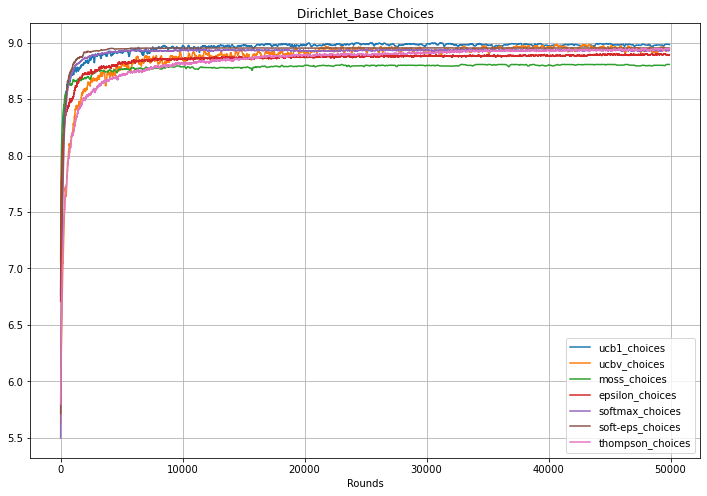

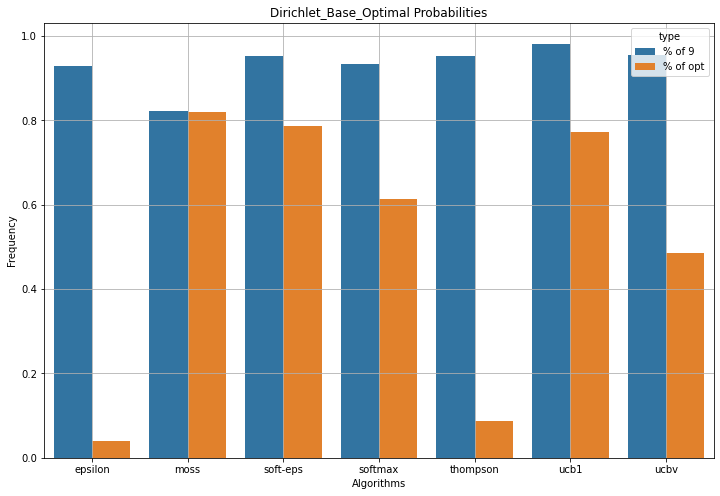

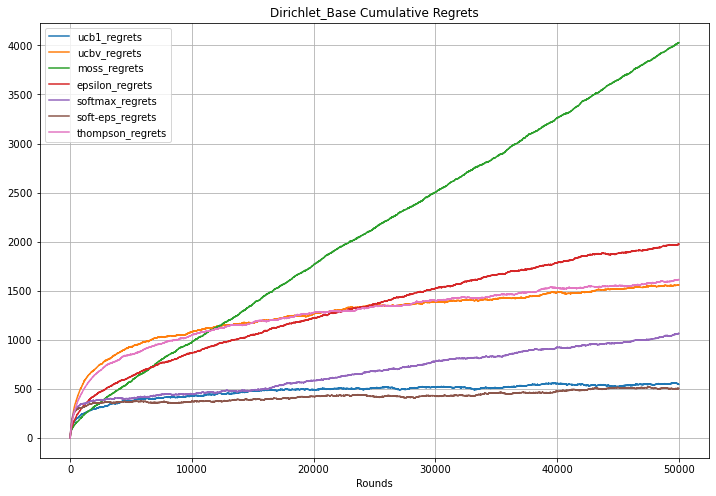

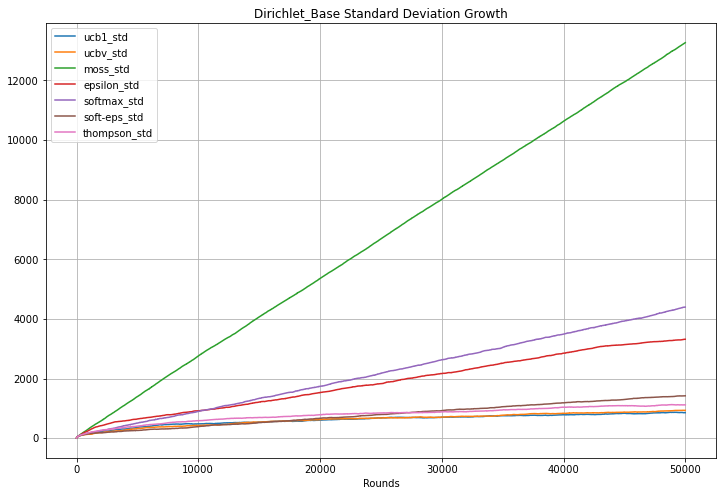

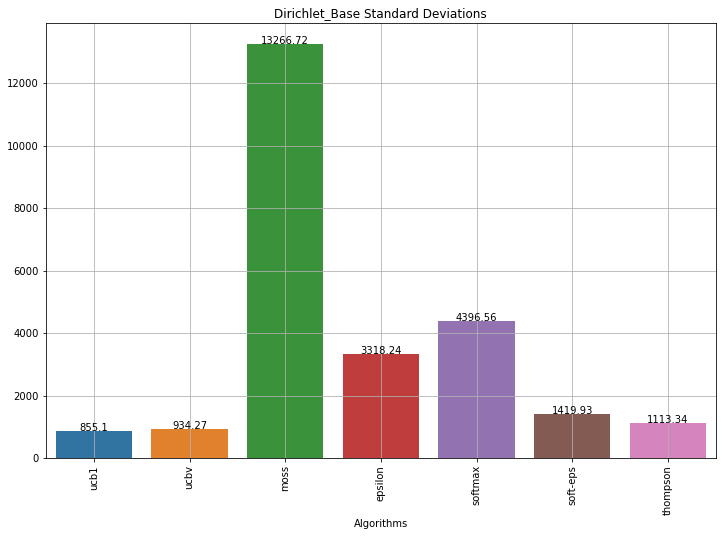

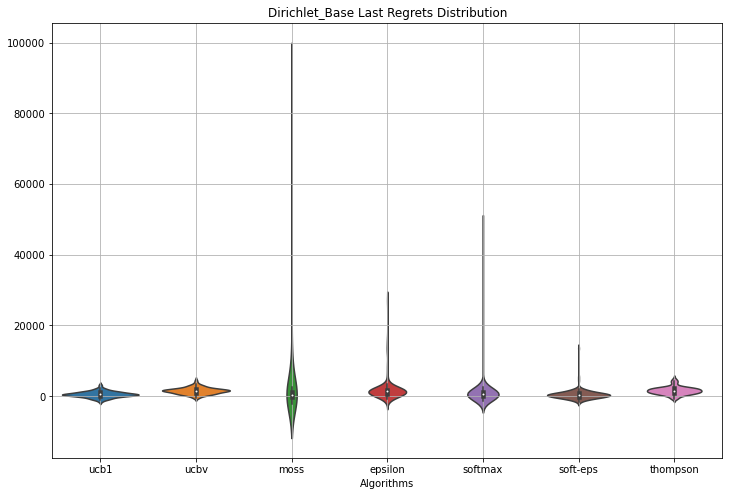

In [293]:
all_plots('Dirichlet_Base')

## Uniform

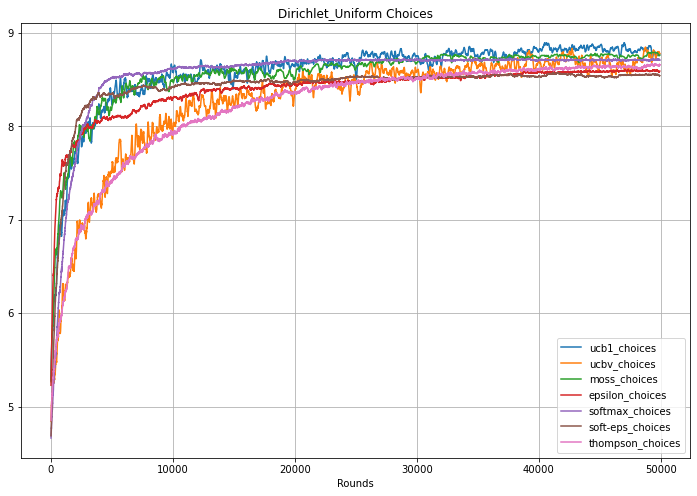

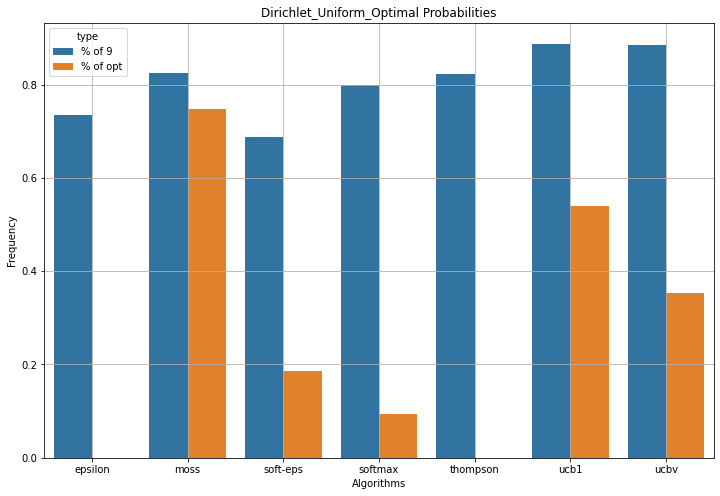

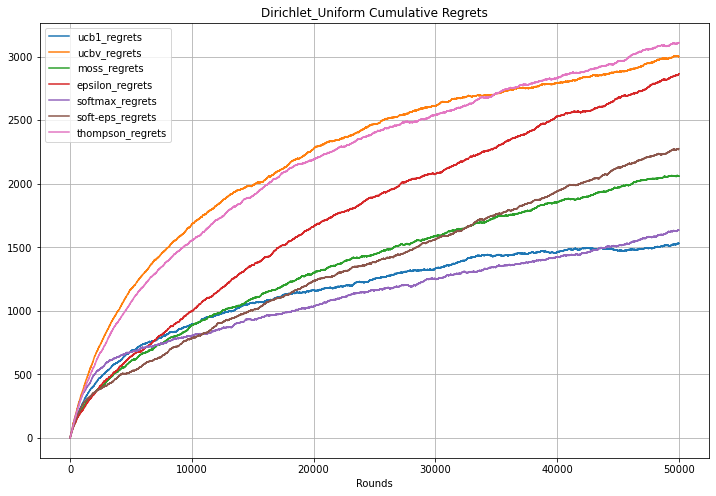

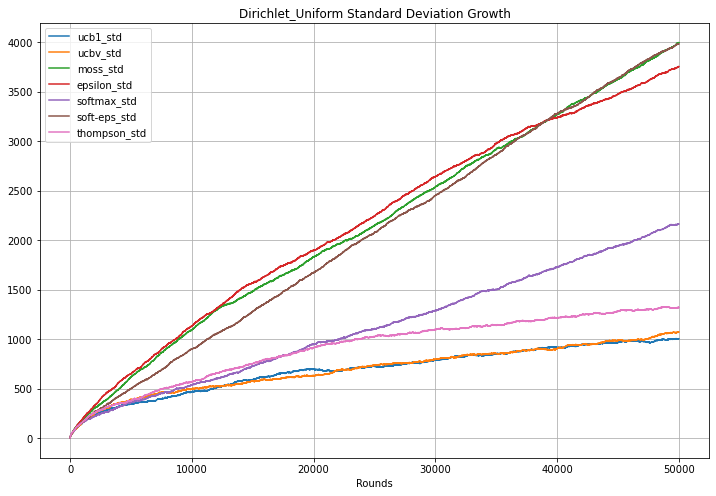

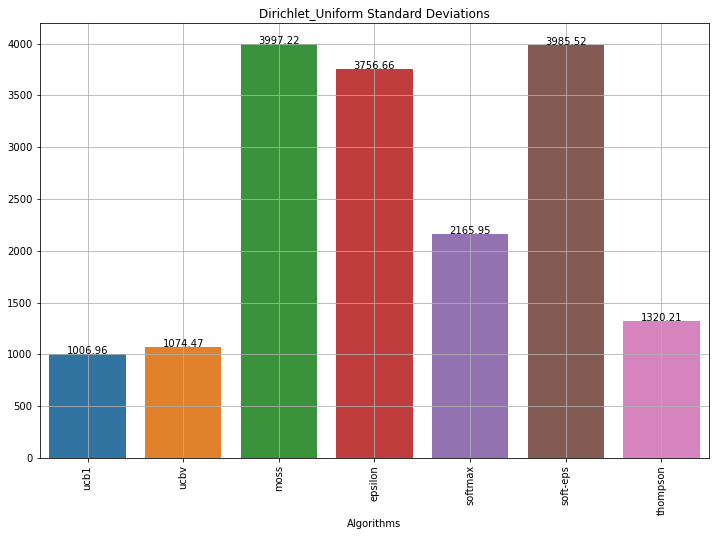

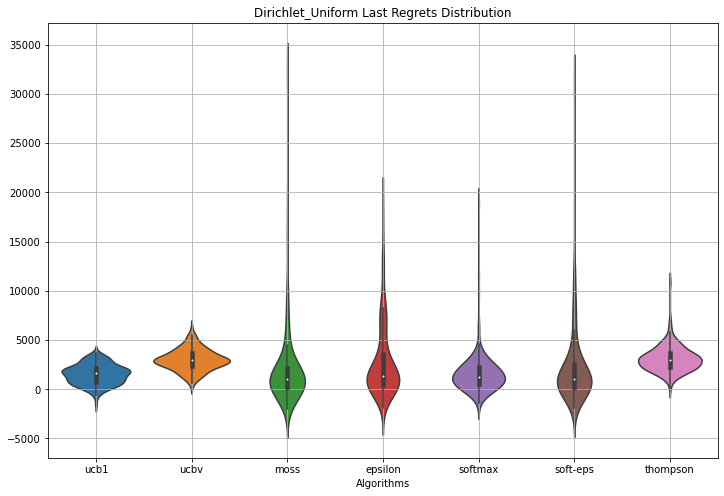

In [294]:
all_plots('Dirichlet_Uniform')

## Degenerate 

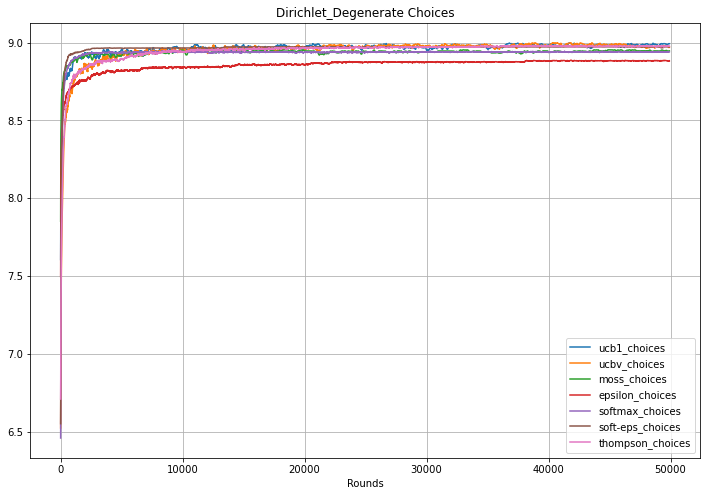

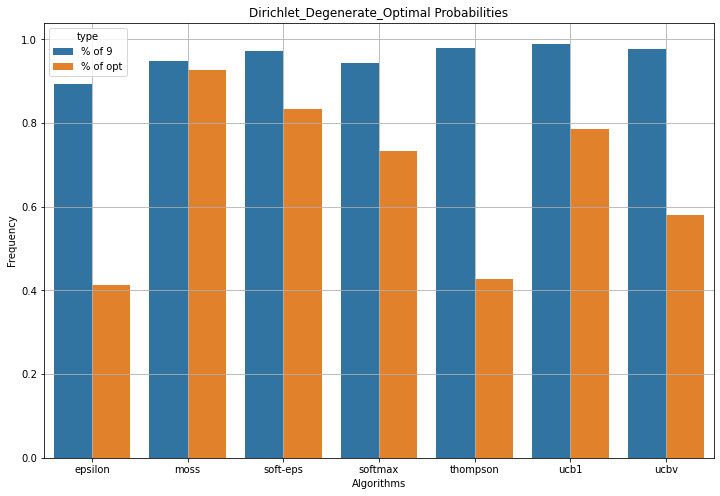

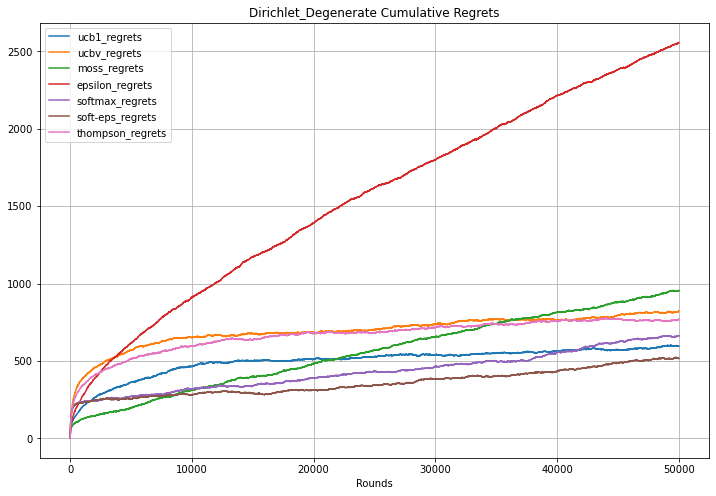

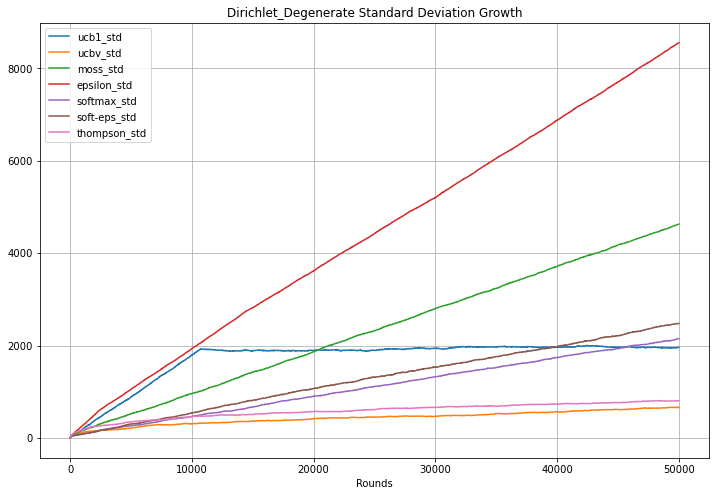

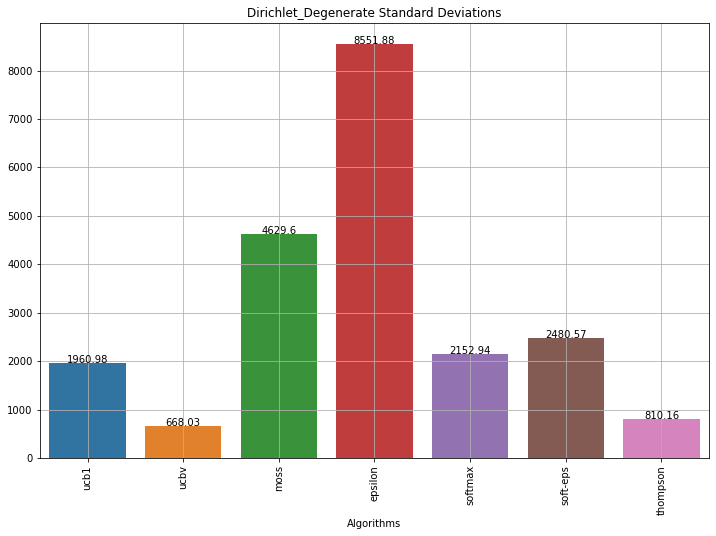

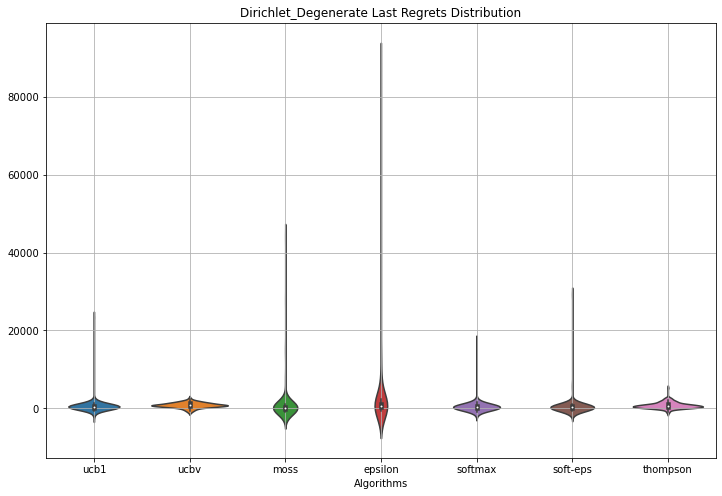

In [295]:
all_plots('Dirichlet_Degenerate')

# Bernoulli

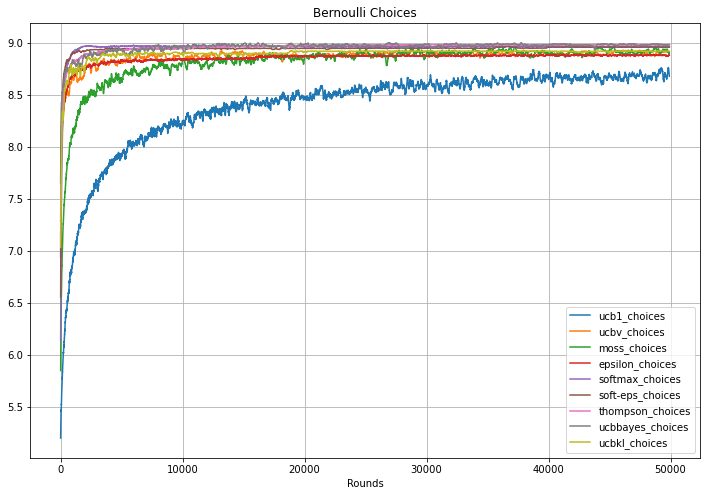

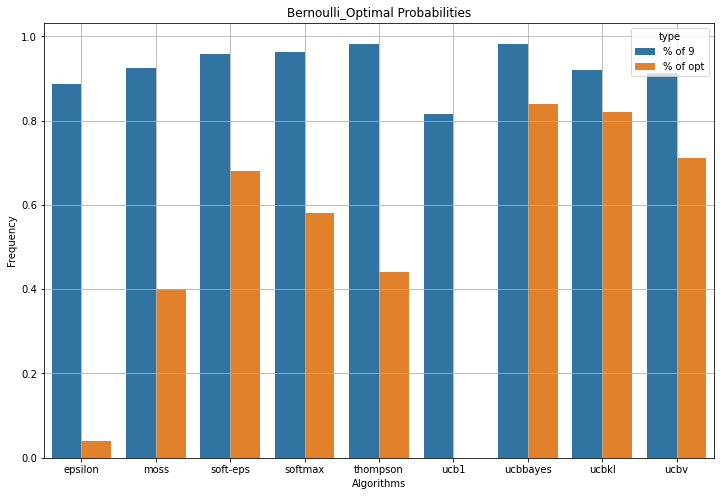

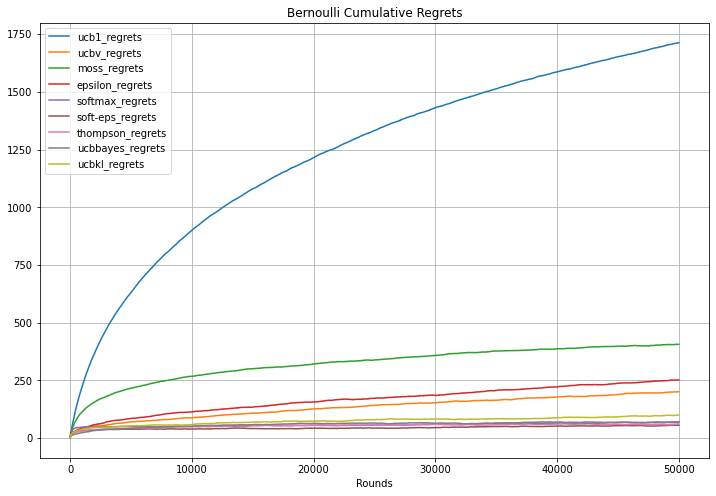

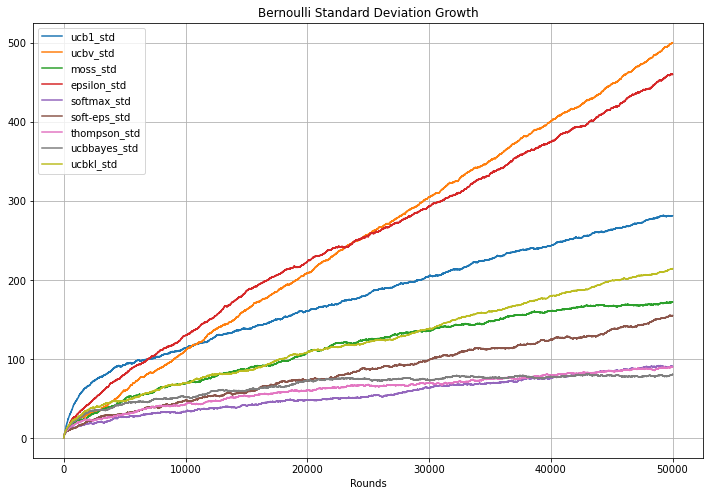

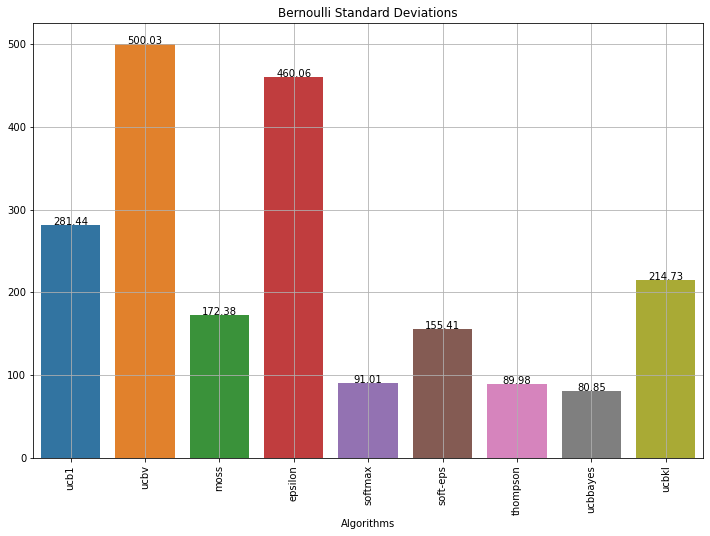

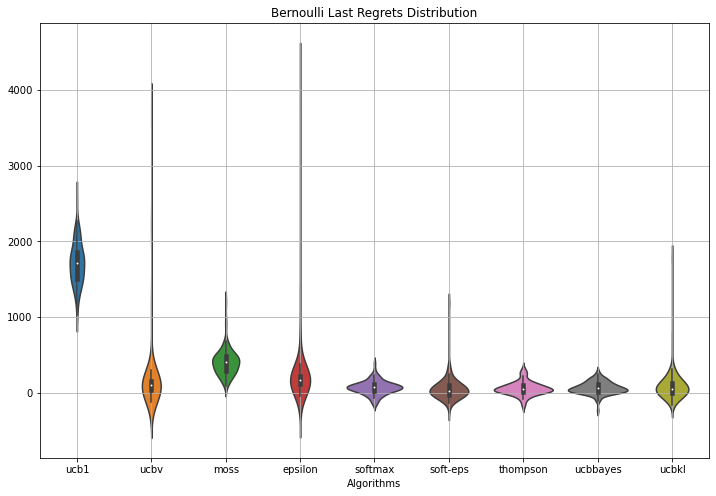

In [311]:
all_plots('Bernoulli')

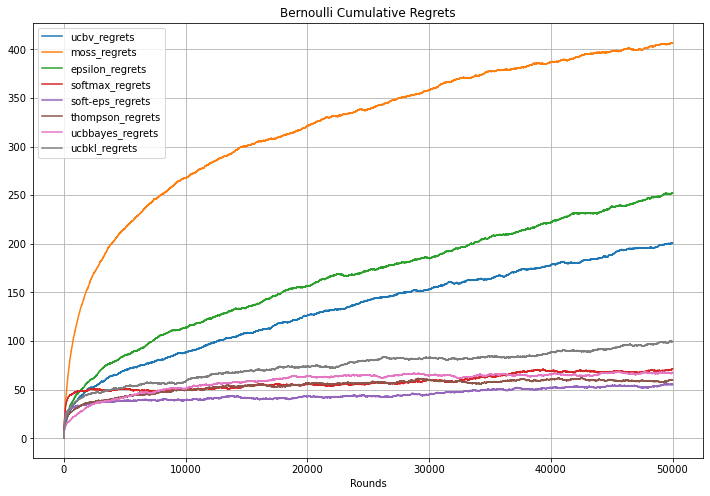

In [312]:
file = pd.read_csv('First Simulations/Bernoulli_Regrets.csv').drop('Unnamed: 0', axis = 1)
cols = []
for col in file.columns:
    if col.split('_')[0] != 'ucb1':
        cols.append(col)
data = file[cols]
cols = data.columns
all_algs = []
for col in cols:
    if col.split('_')[0] not in all_algs:
        all_algs.append(col.split('_')[0])

plt.figure(figsize = (12,8))
for alg in all_algs:
    mean_regrets = pd.DataFrame()
    alg_cols = []
    for col in cols:
        if col.split('_')[0] == alg:
            alg_cols.append(col)
    mean_name = alg + '_regrets'
    mean_regrets = data.loc[:, alg_cols]
    plt.plot(mean_regrets.mean(axis = 1), label = mean_name)
plt.legend()
plt.grid()
plt.xlabel('Rounds')
title = 'Bernoulli' + ' ' + 'Cumulative Regrets'
plt.title(title)
plt.show()

# Poisson

## Poisson 1

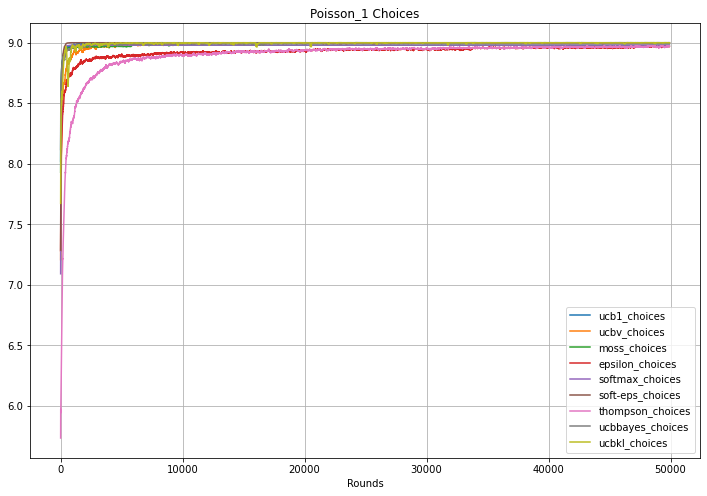

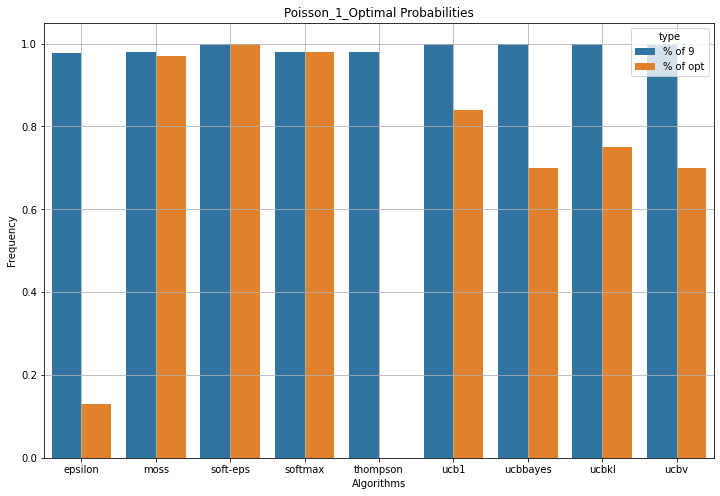

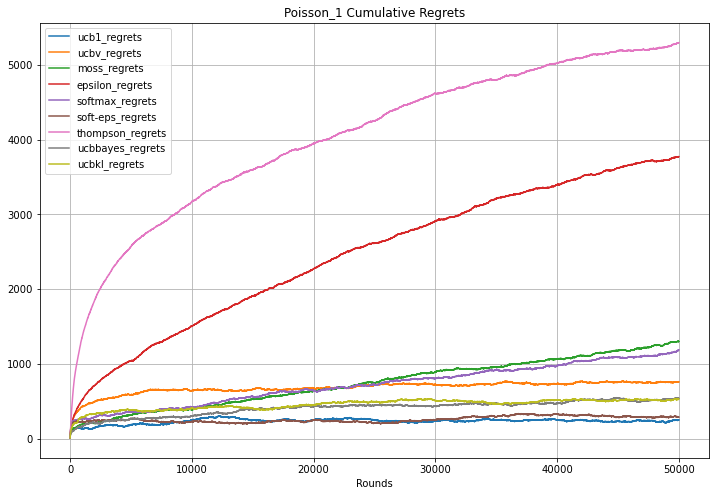

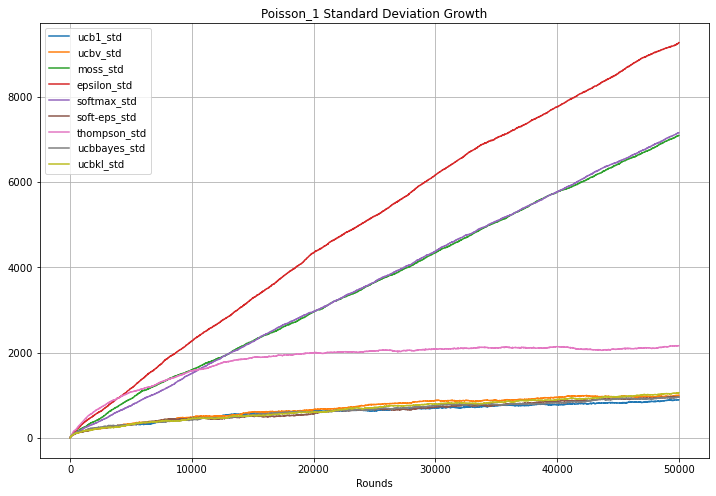

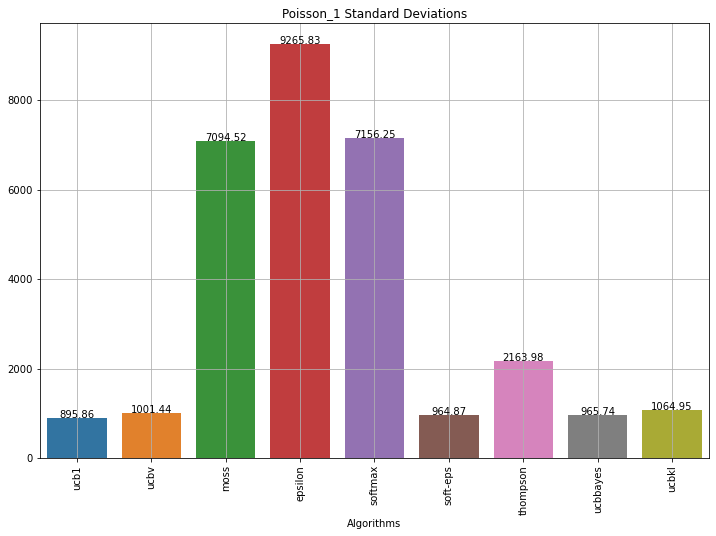

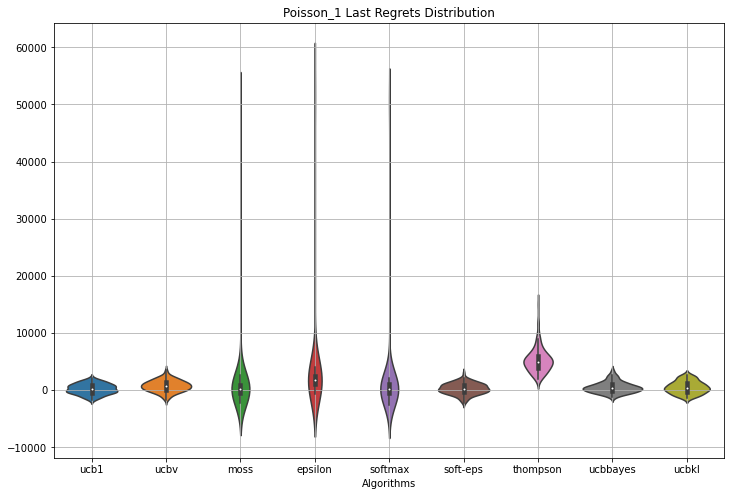

In [296]:
all_plots('Poisson_1')

## Poisson 2

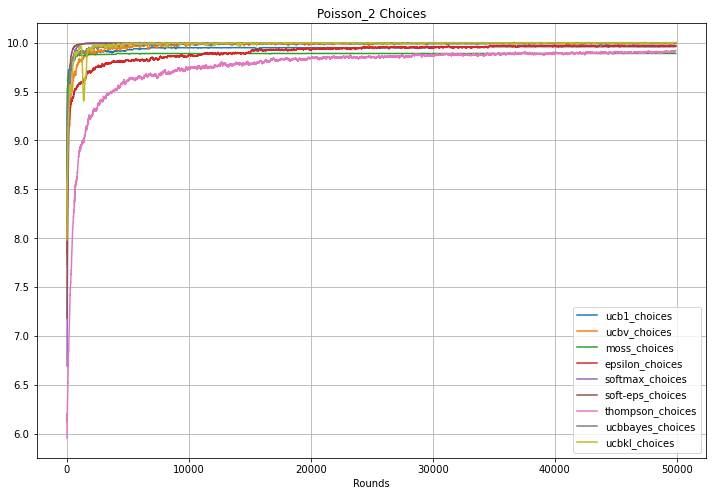

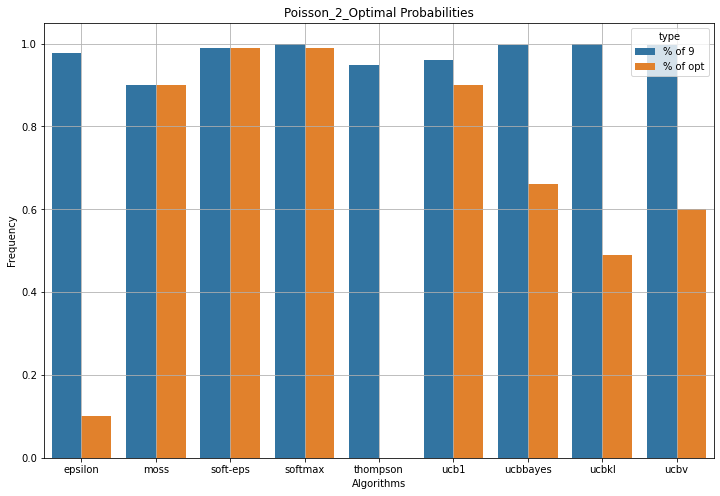

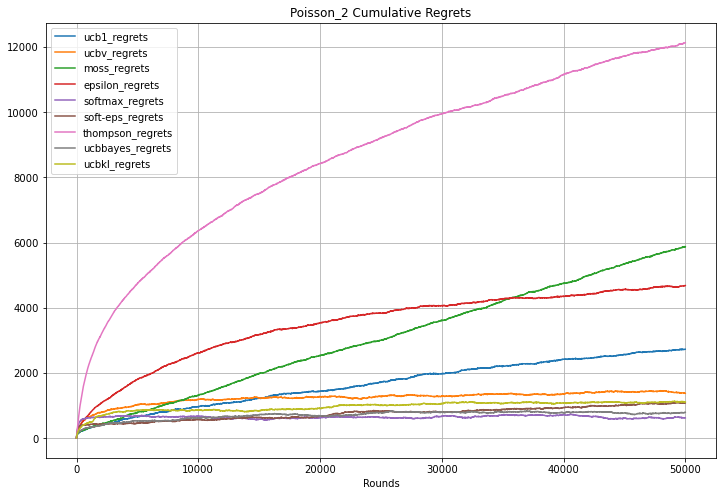

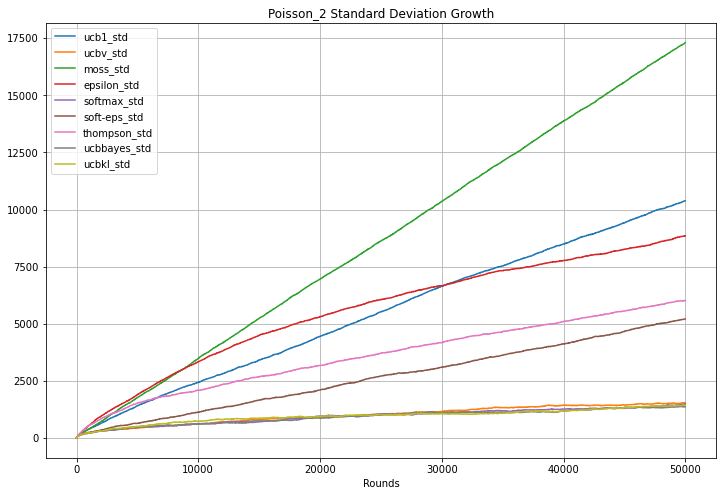

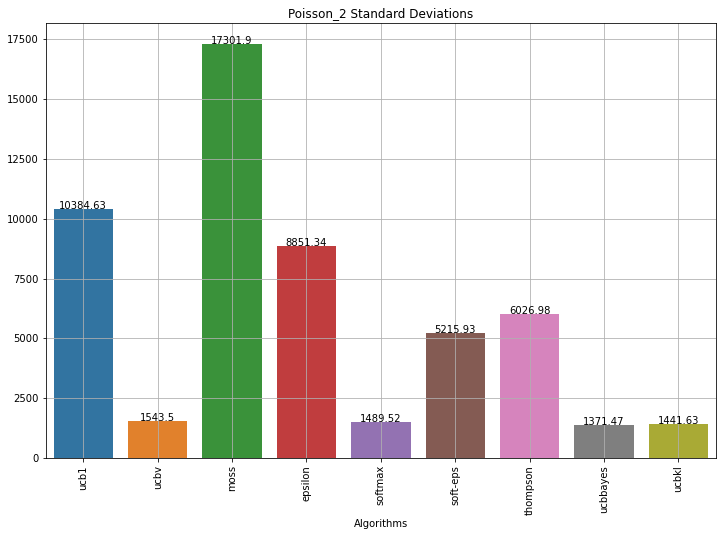

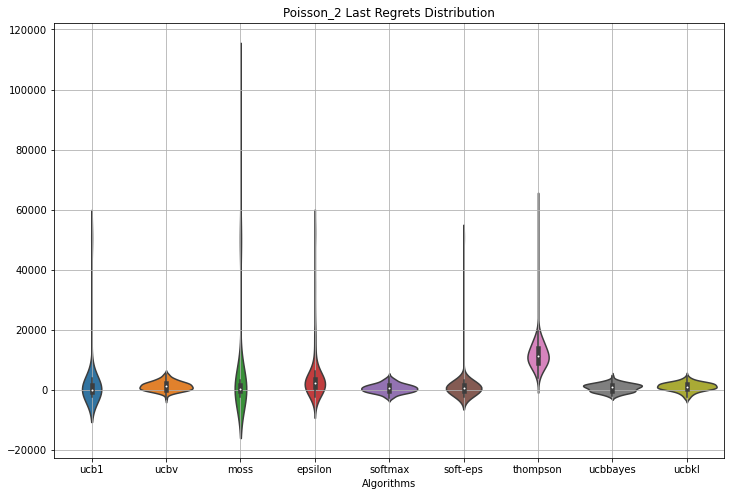

In [297]:
all_plots('Poisson_2')

# Exponential

## Exponential 1

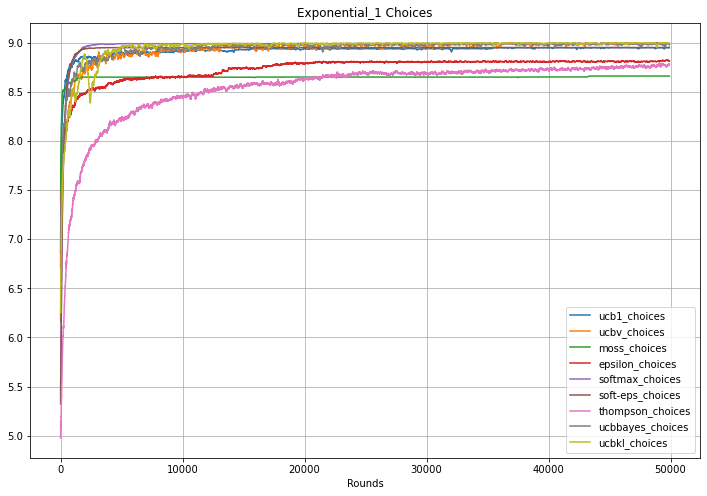

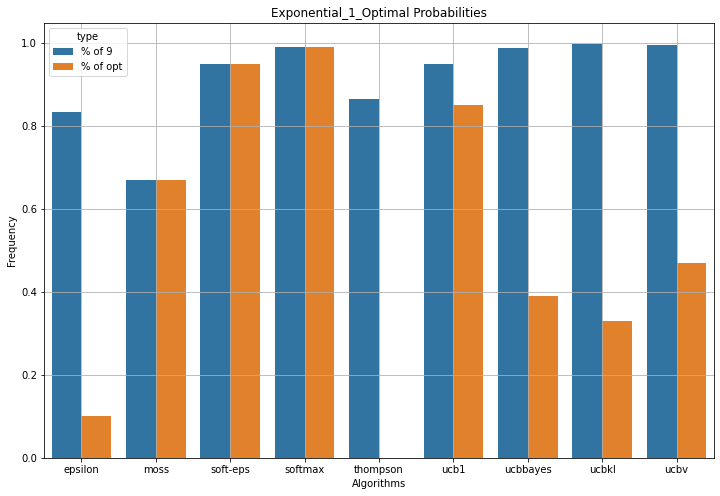

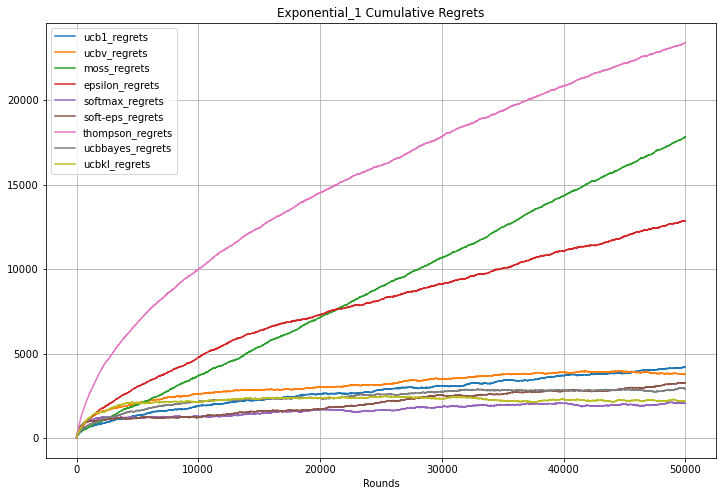

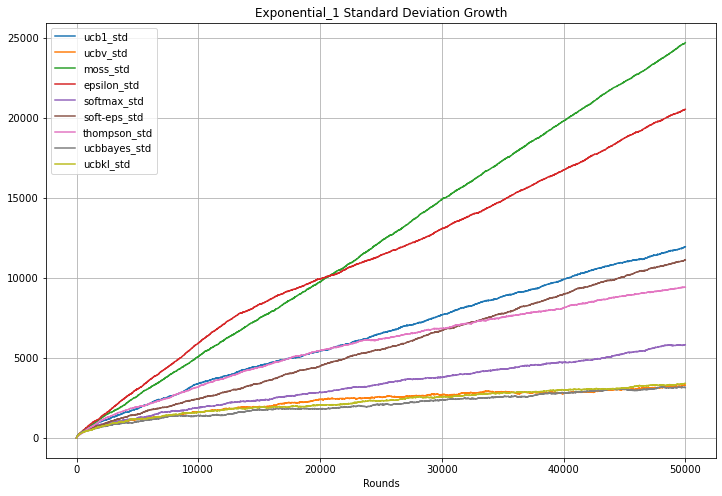

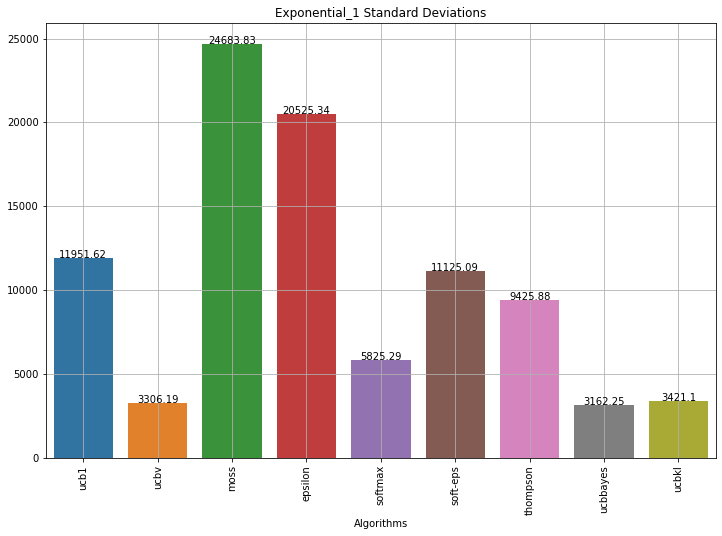

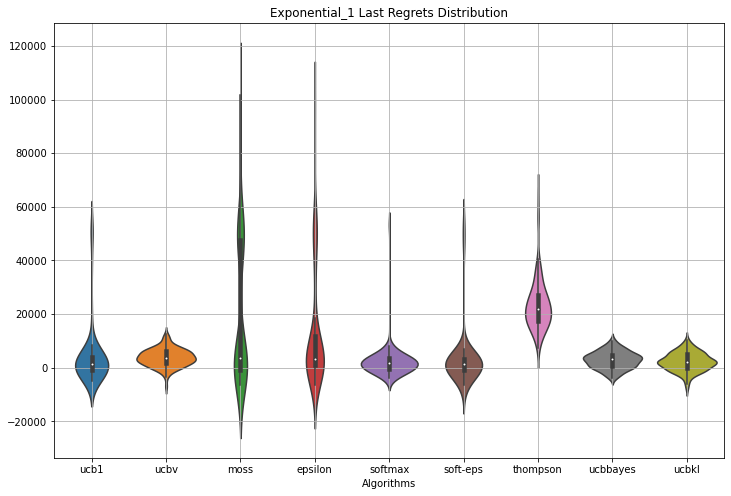

In [298]:
all_plots('Exponential_1')

## Exponential 2

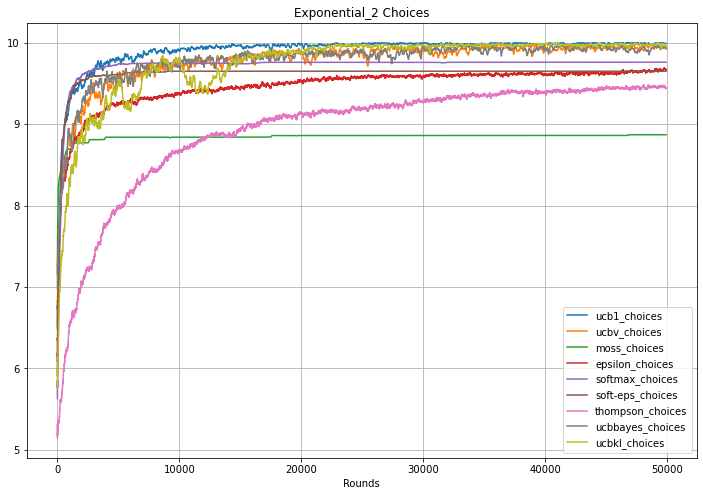

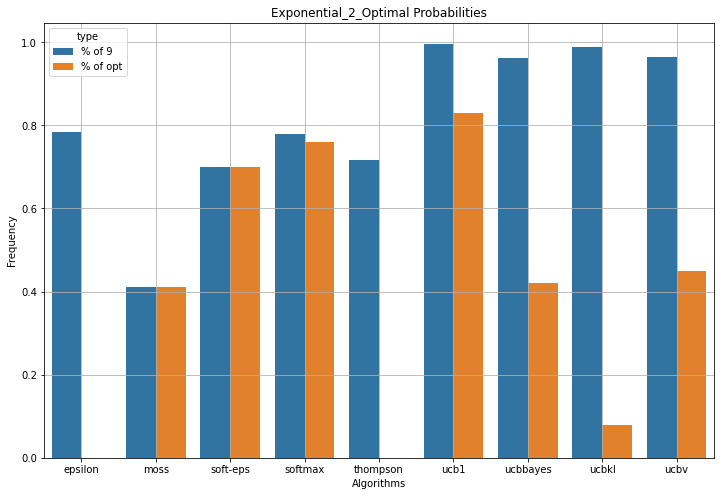

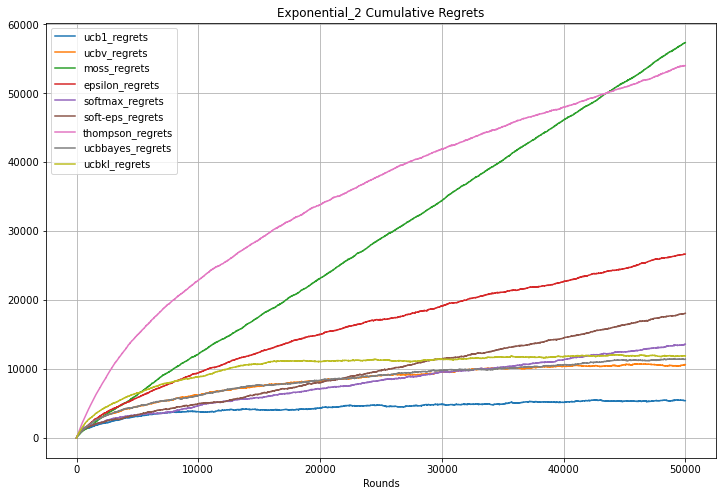

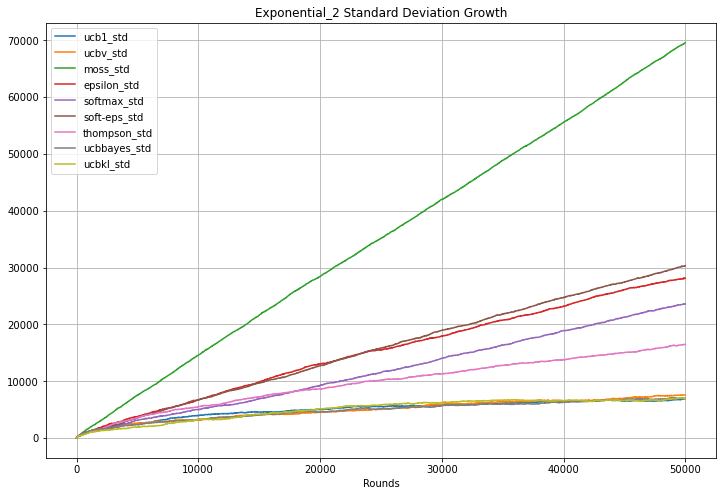

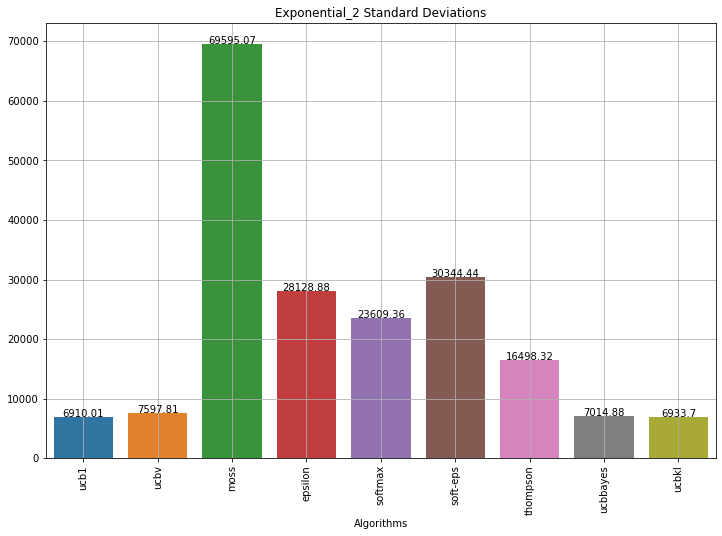

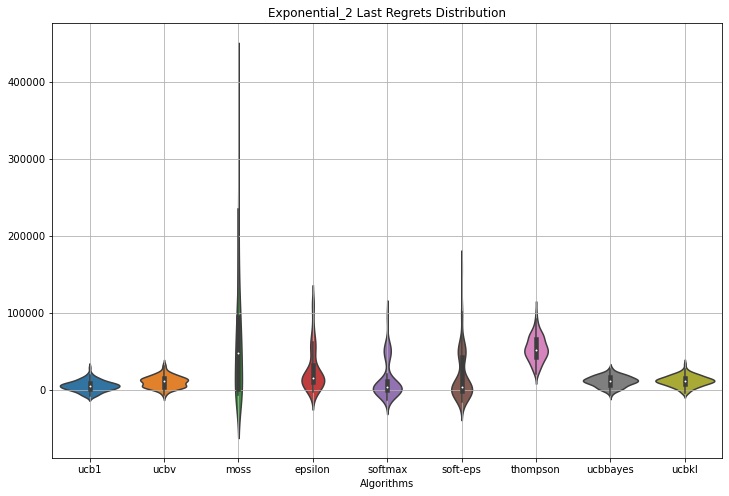

In [299]:
all_plots('Exponential_2')

# MovieLens Dataset

In [3]:
ratings = pd.read_csv('MovieLens/rating.csv')
sample_size = 200000
indexes = np.random.choice(np.arange(ratings.shape[0]), size = sample_size)
ratings = ratings.loc[indexes, :].reset_index(drop = True)
print(ratings.shape)
ratings.head()

(200000, 4)


userId  movieId  rating            timestamp
0  131310     1089     4.0  2004-11-02 01:14:58
1  104945      172     2.0  1996-07-14 17:40:29
2   82764     1078     3.0  2003-07-31 16:47:40
3   73370     4306     3.5  2012-02-12 07:01:50
4   19855     1265     5.0  2000-05-04 19:54:44

In [4]:
movies = pd.read_csv('MovieLens/movie.csv')
print(movies.shape)
movies.head()

(27278, 3)


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
ratings = pd.merge(movies, ratings, on = 'movieId')
ratings = ratings[ratings['genres'] != '(no genres listed)'].reset_index(drop = True)

date_format = '%Y-%m-%d %H:%M:%S'
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], format = date_format)

print(ratings.shape)
ratings.head()

(199997, 6)


movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating           timestamp  
0     929     4.5 2004-08-30 17:17:07  
1   39497     3.5 2004-08-02 13:41:38  
2   61604     3.5 2010-07-27 23:09:33  
3   64216     0.5 2012-09-08 21:42:33  
4   15477     3.0 2000-03-14 20:10:01

In [6]:
genres = list(set(ratings['genres']))
unique_genres = []
for i in tqdm(range(len(genres))):
    if '|' in genres[i]:
        few = genres[i].split('|')
        for g in few:
            if g not in unique_genres:
                unique_genres.append(g)
    else:
        if genres[i] not in unique_genres:
            unique_genres.append(genres[i])
unique_genres = unique_genres[:-1]

100%|████████████████████████████████████████████████████████████████████████████| 947/947 [00:00<00:00, 157832.23it/s]


In [7]:
for i in tqdm(range(len(unique_genres))):
    genre = unique_genres[i]
    ratings[genre] = ratings.apply(lambda x: 1 if genre in x['genres'] else 0, axis = 1)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [01:31<00:00,  5.11s/it]


In [8]:
for i in tqdm(range(len(unique_genres))):
    genre = unique_genres[i]
    print(f'Number of {genre}: {ratings[genre].sum()}')

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 486.34it/s]

Number of Crime: 32929
Number of Film-Noir: 2196
Number of Thriller: 52938
Number of Children: 16727
Number of Sci-Fi: 31334
Number of Adventure: 43962
Number of Comedy: 75311
Number of Fantasy: 21015
Number of Drama: 88788
Number of Romance: 38057
Number of Action: 55931
Number of IMAX: 4814
Number of War: 10561
Number of Mystery: 15435
Number of Animation: 11366
Number of Western: 4189
Number of Documentary: 2459
Number of Musical: 8763


In [9]:
probs_matrix_all = pd.DataFrame()
for i in range(len(unique_genres)):
    probs_matrix = pd.DataFrame()
    genre = unique_genres[i]
    counter = Counter(ratings.loc[ratings[genre] == 1, 'rating'])
    probs_matrix[f'{genre} Rating'] = counter.keys()
    probs_matrix[f'{genre} Rating Num'] = counter.values()
    probs_matrix[f'{genre} Rating Freq'] = probs_matrix[f'{genre} Rating Num']/probs_matrix[f'{genre} Rating Num'].sum()
    probs_matrix.sort_values(f'{genre} Rating', axis = 0, inplace = True)
    probs_matrix.reset_index(drop = True, inplace = True)
    probs_matrix_all = pd.concat([probs_matrix_all, probs_matrix], axis = 1).reset_index(drop = True)
probs_matrix_all

Crime Rating  Crime Rating Num  Crime Rating Freq  Film-Noir Rating  \
0           0.5               270           0.008199               0.5   
1           1.0               788           0.023930               1.0   
2           1.5               346           0.010507               1.5   
3           2.0              1846           0.056060               2.0   
4           2.5              1199           0.036412               2.5   
5           3.0              6365           0.193295               3.0   
6           3.5              3692           0.112120               3.5   
7           4.0              9527           0.289319               4.0   
8           4.5              3343           0.101521               4.5   
9           5.0              5553           0.168636               5.0   

   Film-Noir Rating Num  Film-Noir Rating Freq  Thriller Rating  \
0                    12               0.005464              0.5   
1                    26               0.011840              1.0   
2                     6               0.002732              1.5   
3                    71               0.032332              2.0   
4                    43               0.019581              2.5   
5                   314               0.142987              3.0   
6                   224               0.102004              3.5   
7                   704               0.320583              4.0   
8                   258               0.117486              4.5   
9                   538               0.244991              5.0   

   Thriller Rating Num  Thriller Rating Freq  Children Rating  ...  \
0                  546              0.010314              0.5  ...   
1                 1644              0.031055              1.0  ...   
2                  713              0.013469              1.5  ...   
3                 3872              0.073142              2.0  ...   
4                 2417              0.045657              2.5  ...   
5                11857              0.223979              3.0  ...   
6                 6026              0.113831              3.5  ...   
7                14671              0.277136              4.0  ...   
8                 4161              0.078601              4.5  ...   
9                 7031              0.132816              5.0  ...   

   Animation Rating Freq  Western Rating  Western Rating Num  \
0               0.012141             0.5                  29   
1               0.023491             1.0                 135   
2               0.009854             1.5                  37   
3               0.059476             2.0                 307   
4               0.041703             2.5                 152   
5               0.208781             3.0                1025   
6               0.123966             3.5                 418   
7               0.284709             4.0                1194   
8               0.087014             4.5                 315   
9               0.148865             5.0                 577   

   Western Rating Freq  Documentary Rating  Documentary Rating Num  \
0             0.006923                 0.5                      40   
1             0.032227                 1.0                      50   
2             0.008833                 1.5                      15   
3             0.073287                 2.0                      78   
4             0.036286                 2.5                      97   
5             0.244688                 3.0                     362   
6             0.099785                 3.5                     342   
7             0.285032                 4.0                     762   
8             0.075197                 4.5                     306   
9             0.137742                 5.0                     407   

   Documentary Rating Freq  Musical Rating  Musical Rating Num  \
0                 0.016267             0.5                 118   
1                 0.020333             1.0                 254   
2    

In [10]:
for i in tqdm(range(len(unique_genres))):
    genre = unique_genres[i]
    mean = (probs_matrix_all[f'{genre} Rating']*probs_matrix_all[f'{genre} Rating Freq']).sum()
    print(f'Mean {genre}: {mean}')

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 666.52it/s]

Mean Crime: 3.676546509156063
Mean Film-Noir: 3.954234972677596
Mean Thriller: 3.5135158109486566
Mean Children: 3.400400550008968
Mean Sci-Fi: 3.446001148911725
Mean Adventure: 3.5073131340703334
Mean Comedy: 3.431331412409874
Mean Fantasy: 3.485629312395908
Mean Drama: 3.6699666621615536
Mean Romance: 3.5403605118637835
Mean Action: 3.447578266077846
Mean IMAX: 3.6594308267552966
Mean War: 3.8147429220717735
Mean Mystery: 3.666861030126336
Mean Animation: 3.602498680274503
Mean Western: 3.5367629505848655
Mean Documentary: 3.755185034566897
Mean Musical: 3.5552892844916126


In [11]:
ratings_final = pd.DataFrame()
for i in tqdm(range(len(unique_genres))):
    genre = unique_genres[i]
    ratings_final[genre] = np.random.choice(np.array(probs_matrix_all[f'{genre} Rating']), p = np.array(probs_matrix_all[f'{genre} Rating Freq']), size = 200000)
ratings_final.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 39.64it/s]


Crime  Film-Noir  Thriller  Children  Sci-Fi  Adventure  Comedy  Fantasy  \
0    4.0        5.0       4.0       2.5     4.5        2.5     2.0      4.0   
1    4.0        4.0       3.5       5.0     3.0        4.0     3.0      1.5   
2    5.0        4.0       3.0       4.0     4.0        3.0     4.0      4.0   
3    2.5        3.0       4.0       4.0     5.0        3.5     4.0      2.0   
4    3.0        4.0       3.0       3.5     3.5        5.0     5.0      3.0   

   Drama  Romance  Action  IMAX  War  Mystery  Animation  Western  \
0    5.0      4.0     2.0   1.0  5.0      4.0        5.0      1.0   
1    3.5      4.0     2.5   3.0  4.0      3.5        3.0      3.0   
2    4.0      3.5     5.0   5.0  1.0      4.0        3.0      5.0   
3    5.0      2.0     2.0   3.0  4.0      5.0        4.0      4.0   
4    3.0      3.5     4.5   5.0  3.0      3.5        5.0      4.0   

   Documentary  Musical  
0          4.0      5.0  
1          3.0      3.0  
2          2.0      4.0  
3          4.0      3.0  
4          5.0      3.0

100%|████████████████████████████████████████████████████████████████████████| 200000/200000 [00:58<00:00, 3418.94it/s]


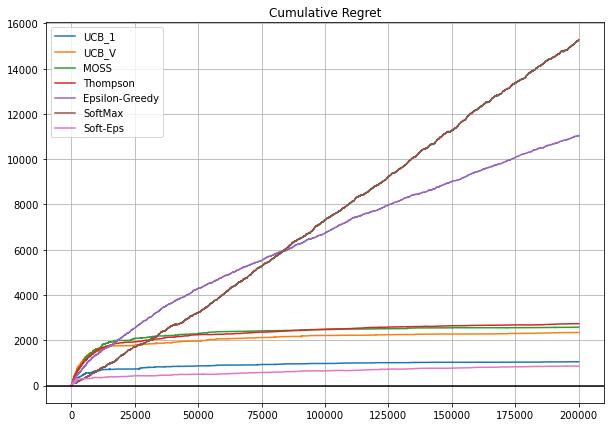

In [16]:
n_rounds = ratings_final.shape[0]
soft_eps_regrets, soft_eps_choices = real_experiment(data = ratings_final, player = 'soft_eps', temp = 0.05)
eps_regrets, eps_choices = real_experiment(data = ratings_final, player = 'epsilon')
soft_regrets, soft_choices = real_experiment(data = ratings_final, player = 'softmax', temp = 0.1)
ucb_1_regrets, ucb_1_choices = real_experiment(data = ratings_final, player = 'ucb_1', beta = 1)
ucb_v_regrets, ucb_v_choices = real_experiment(data = ratings_final, player = 'ucb_v', beta = 1)
ucb_moss_regrets, ucb_moss_choices = real_experiment(data = ratings_final, player = 'ucb_moss')
thom_regrets, thom_choices = real_experiment(data = ratings_final, player = 'thompson', dist = 'Dirichlet', lb = 0.5, ub = 5)

y = [ucb_1_regrets, 
     ucb_v_regrets, 
     ucb_moss_regrets,
     thom_regrets, 
     eps_regrets,
     soft_regrets,
     soft_eps_regrets]
x = [np.arange(1, n_rounds + 1) for i in range(len(y))]
labels = ['UCB_1', 'UCB_V', 'MOSS', 'Thompson', 'Epsilon-Greedy', 'SoftMax', 'Soft-Eps']
cum_regret_plot(x, y, labels, big = True)

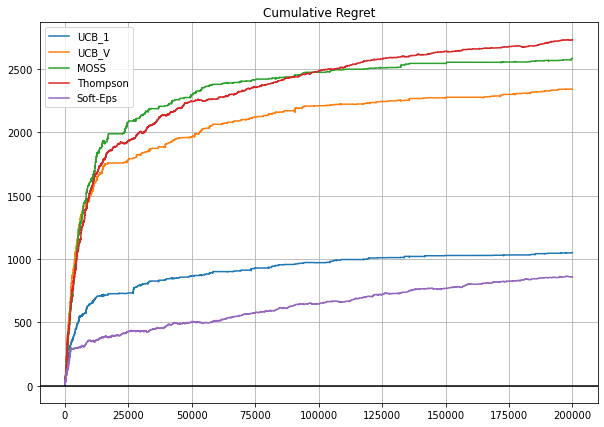

In [18]:
y = [ucb_1_regrets, 
     ucb_v_regrets, 
     ucb_moss_regrets,
     thom_regrets,
     soft_eps_regrets]
x = [np.arange(1, n_rounds + 1) for i in range(len(y))]
labels = ['UCB_1', 'UCB_V', 'MOSS', 'Thompson', 'Soft-Eps']
cum_regret_plot(x, y, labels, big = True)